In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter
import plotly.plotly as py
import vincent
import json
from sklearn import linear_model

In [5]:
iter_csv = pd.read_table('./data/mapAffil_2016_nonull.tsv', sep='\t', encoding='latin-1',
                         dtype={'PMID': object, 
                                'au_order': np.int64, 
                                'year': np.int64,
                                'type': object, 
                                'city': object, 
                                'state':object, 
                                'country': object,
                                'lat': np.float64, 
                                'lon': np.float64, 
                                'fips': object},
                         iterator=True, chunksize=10**6)

mapAffil = pd.concat([chunk[pd.notnull(chunk['fips'])] for chunk in iter_csv])
mapAffil = mapAffil.drop(['Unnamed: 0'], 1)

In [13]:
iter_csv = pd.read_csv('./data/mesh_groups.tsv', 
                        sep='\t',
                        dtype={'PMID': object}, 
                        iterator=True, 
                        chunksize=10**6)

mdf = pd.concat([chunk for chunk in iter_csv])
# mdf.to_csv('./data/mesh_groups.csv', index=False)

### Groups:

25025 - Boston
36061 - NYC Manhattan
17031 - Chicago
24510 - Baltimore, MD
42101 - Philadelphia
48201 - Houston TX



22073 - Monroe, LA
54011 - Huntington, WV
05143 - Fayetteville, AK
29019 - Columbia, MO
26111 - Midland, MI
47065 - Chattanooga, TN

### Mortality

In [2]:
mort = pd.read_table('./data/mort_pubs.tsv',sep='\t', encoding='latin-1', na_values='Missing',
                    dtype={'fips': object})
mort = mort.drop(['Unnamed: 0'], 1)

In [3]:
mort.head()

fips cause  year        rate  delta_pub  delta_rate  pubs_1988  pubs_1989  \
0  01001   all  1999  1064.73351  -0.007337  -10.863475        0.0        0.0   
1  01001   all  2000  1021.78792  -0.007337  -10.863475        0.0        0.0   
2  01001   all  2001  1008.79702  -0.007337  -10.863475        0.0        0.0   
3  01001   all  2002  1037.62083  -0.007337  -10.863475        0.0        0.0   
4  01001   all  2003  1038.44489  -0.007337  -10.863475        0.0        0.0   

   pubs_1990  pubs_1991    ...      pubs_2008  pubs_2009  pubs_2010  \
0        0.0        0.0    ...            0.0        0.0        0.0   
1        0.0        0.0    ...            0.0        0.0        0.0   
2        0.0        0.0    ...            0.0        0.0        0.0   
3        0.0        0.0    ...            0.0        0.0        0.0   
4        0.0        0.0    ...            0.0        0.0        0.0   

   pubs_2011  pubs_2012  pubs_2013  pubs_2014  pubs_2015  pubs_2016  pubs_2017  
0        0.0        0.0        0.0        0.0        0.0        1.0        0.0  
1        0.0        0.0        0.0        0.0        0.0        1.0        0.0  
2        0.0        0.0        0.0        0.0        0.0        1.0        0.0  
3        0.0        0.0        0.0        0.0        0.0        1.0        0.0  
4        0.0        0.0        0.0        0.0        0.0        1.0        0.0  

[5 rows x 36 columns]

In [4]:
pubs_cols = mort.columns[mort.columns.str.startswith('pubs')]
mort['pub_sum'] = mort.loc[:,pubs_cols].sum(axis=1, numeric_only=True)

In [5]:
print(mort.loc[ (mort.delta_rate < -10)  & (mort.pub_sum > 10) ,:].shape)
print(mort.loc[ (mort.delta_rate > -10) & (mort.delta_rate < -5)  & (mort.pub_sum > 10) ,:].shape)
print(mort.loc[ (mort.delta_rate > -5)  & (mort.pub_sum > 10) ,:].shape)

(15124, 37)
(20880, 37)
(67733, 37)


In [6]:
# mort.loc[ (mort.delta_rate < -10) ,:].shape
# mort.loc[ (mort.delta_rate < -10) & (mort.pub_sum > 10) ,['fips', 'delta_rate', 'pub_sum']].drop_duplicates()
# mort.loc[ (mort.delta_rate > -10) & (mort.delta_rate < -5) & (mort.pub_sum > 30) ,['fips', 'delta_rate', 'pub_sum']].drop_duplicates()
mort.loc[ (mort.delta_rate > -5) & (mort.pub_sum > 200) ,['fips', 'delta_rate', 'pub_sum']].drop_duplicates()

fips  delta_rate  pub_sum
1542    01073    3.398983  43331.0
1558    01073   -2.861765  43331.0
1574    01073    0.437164  43331.0
1590    01073   -1.799490  43331.0
1794    01081    3.528637   6551.0
1805    01081   -0.637059   6551.0
1821    01081    0.099998   6551.0
1836    01081   -0.185190   6551.0
1966    01087   -4.266765    475.0
1982    01087    0.000000    475.0
1983    01087   -0.577542    475.0
2017    01089    2.214245   1940.0
2033    01089   -3.492059   1940.0
2049    01089    1.319442   1940.0
2065    01089   -0.786693   1940.0
2259    01097    2.433706   4621.0
2275    01097   -2.743529   4621.0
2291    01097    1.205556   4621.0
2307    01097    0.176602   4621.0
2355    01101    2.728501    524.0
2371    01101   -3.706471    524.0
2387    01101    1.085875    524.0
2403    01101   -0.917892    524.0
3107    01125    3.400751   3195.0
3123    01125   -3.493676   3195.0
3139    01125    0.541167   3195.0
3155    01125    0.178394   3195.0
3261    02020   -4.955547   1964.0
3293    02020    3.291216   1964.0
3309    02020   -2.115882   1964.0
...       ...         ...      ...
145574  55073    2.226047    211.0
145590  55073    0.185546    211.0
145742  55079    2.044102  31489.0
145758  55079   -2.239118  31489.0
145774  55079    0.591975  31489.0
145790  55079   -1.290244  31489.0
146068  55087    3.171968    215.0
146084  55087   -3.520735    215.0
146100  55087    0.281927    215.0
146116  55087   -0.285778    215.0
147312  55127    1.698117    235.0
147328  55127   -0.366471    235.0
147344  55127    0.754579    235.0
147360  55127   -0.194363    235.0
147556  55133    2.515783    620.0
147572  55133   -2.692500    620.0
147588  55133    0.678422    620.0
147604  55133   -1.131629    620.0
147746  55139    3.011780    488.0
147762  55139   -2.068382    488.0
147778  55139    0.921079    488.0
147794  55139   -0.029746    488.0
147810  55141   -4.700548   2014.0
147842  55141    1.476287   2014.0
147858  55141   -1.848088   2014.0
147874  55141    0.069191   2014.0
147890  55141   -1.017237   2014.0
147938  56001   -4.589853   3483.0
147954  56001   -4.425814   3483.0
147958  56001   -3.459844   3483.0

[2004 rows x 3 columns]

In [180]:
mort.loc[mort.fips =='01045',:]

fips        cause  year        rate  delta_pub  delta_rate  pubs_1988  \
754  01045          all  1999   975.35041   0.007486   -8.610866        3.0   
755  01045          all  2000   990.09569   0.007486   -8.610866        3.0   
756  01045          all  2001   945.77493   0.007486   -8.610866        3.0   
757  01045          all  2002  1026.38962   0.007486   -8.610866        3.0   
758  01045          all  2003   987.71473   0.007486   -8.610866        3.0   
759  01045          all  2004   908.17507   0.007486   -8.610866        3.0   
760  01045          all  2005   931.94385   0.007486   -8.610866        3.0   
761  01045          all  2006   923.39470   0.007486   -8.610866        3.0   
762  01045          all  2007   854.50572   0.007486   -8.610866        3.0   
763  01045          all  2008   874.72662   0.007486   -8.610866        3.0   
764  01045          all  2009   981.44422   0.007486   -8.610866        3.0   
765  01045          all  2010   877.59196   0.007486   -8.610866        3.0   
766  01045          all  2011   885.96301   0.007486   -8.610866        3.0   
767  01045          all  2012   833.11112   0.007486   -8.610866        3.0   
768  01045          all  2013   925.16223   0.007486   -8.610866        3.0   
769  01045          all  2014   851.14652   0.007486   -8.610866        3.0   
770  01045  circulatory  1999   353.51836   0.007486   -6.153329        3.0   
771  01045  circulatory  2000   360.24926   0.007486   -6.153329        3.0   
772  01045  circulatory  2001   385.20810   0.007486   -6.153329        3.0   
773  01045  circulatory  2002   401.08247   0.007486   -6.153329        3.0   
774  01045  circulatory  2003   390.55665   0.007486   -6.153329        3.0   
775  01045  circulatory  2004   331.11135   0.007486   -6.153329        3.0   
776  01045  circulatory  2005   319.46034   0.007486   -6.153329        3.0   
777  01045  circulatory  2006   308.48064   0.007486   -6.153329        3.0   
778  01045  circulatory  2007   291.68657   0.007486   -6.153329        3.0   
779  01045  circulatory  2008   292.83783   0.007486   -6.153329        3.0   
780  01045  circulatory  2009   341.78246   0.007486   -6.153329        3.0   
781  01045  circulatory  2010   316.78350   0.007486   -6.153329        3.0   
782  01045  circulatory  2011   307.09838   0.007486   -6.153329        3.0   
783  01045  circulatory  2012   277.29203   0.007486   -6.153329        3.0   
..     ...          ...   ...         ...        ...         ...        ...   
801  01045    neoplasms  2012   176.00000   0.007486   -2.523235        3.0   
802  01045    neoplasms  2013   191.50000   0.007486   -2.523235        3.0   
803  01045    neoplasms  2014   196.50000   0.007486   -2.523235        3.0   
804  01045      nervous  2002    47.19787   0.007486   -0.818815        3.0   
805  01045      nervous  2003    62.12646   0.007486   -0.818815        3.0   
806  01045      nervous  2004    59.05319   0.007486   -0.818815        3.0   
807  01045      nervous  2005    53.35785   0.007486   -0.818815        3.0   
808  01045      nervous  2006    45.16053   0.007486   -0.818815        3.0   
809  01045      nervous  2008    46.43893   0.007486   -0.818815        3.0   
810  01045      nervous  2009    48.38669   0.007486   -0.818815        3.0   
811  01045      nervous  2010    42.73695   0.007486   -0.818815        3.0   
812  01045      nervous  2012    38.20780   0.007486   -0.818815        3.0   
813  01045      nervous  2013    45.43621   0.007486   -0.818815        3.0   
814  01045      nervous  2014    54.55833   0.007486   -0.818815        3.0   
815  01045  respiratory  1999   123.11863   0.007486   -1.018925        3.0   
816  01045  respiratory  2000   105.84818   0.007486   -1.018925        3.0   
817  01045  respiratory  2001    89.80618   0.007486   -1.018925        3.0   
818  01045  respiratory  2002   116.53900   0.007486   -1.018925        3.0   
819  01045  respiratory  2003   128.56605   0.007486   -

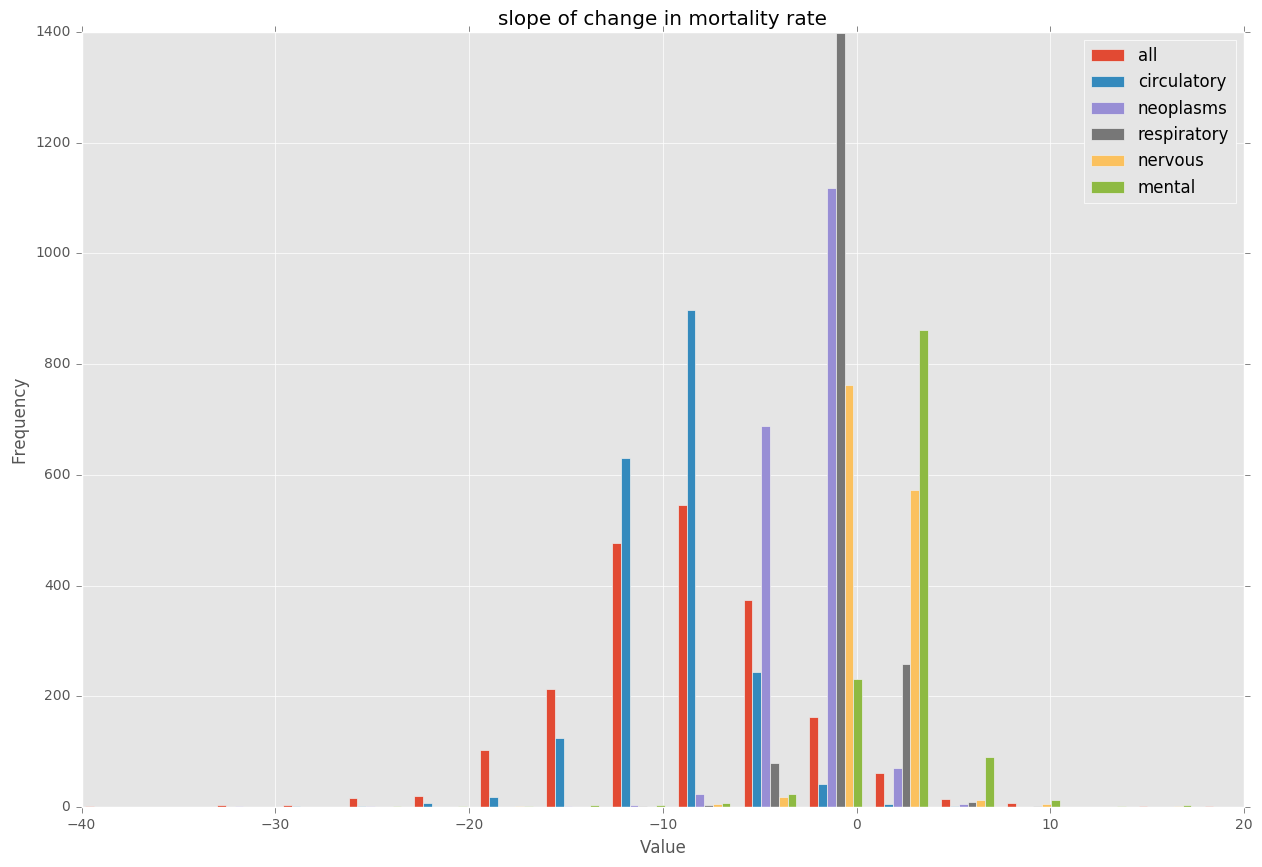

In [115]:
f, axs = plt.subplots(1,1, figsize=(15,10))
axs.hist(x=[mort.loc[mort.cause == 'all' ,'delta_rate'].drop_duplicates(),
                    mort.loc[mort.cause == 'circulatory','delta_rate'].drop_duplicates(),
                    mort.loc[mort.cause == 'neoplasms','delta_rate'].drop_duplicates(), 
                    mort.loc[mort.cause == 'respiratory','delta_rate'].drop_duplicates(),
                    mort.loc[mort.cause == 'nervous','delta_rate'].drop_duplicates(),
                    mort.loc[mort.cause == 'mental','delta_rate'].drop_duplicates()], 
         bins=100, 
         stacked=False, 
         label=['all','circulatory','neoplasms','respiratory','nervous','mental'])
plt.title("slope of change in mortality rate")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(-40,20)
plt.legend()

plt.show()

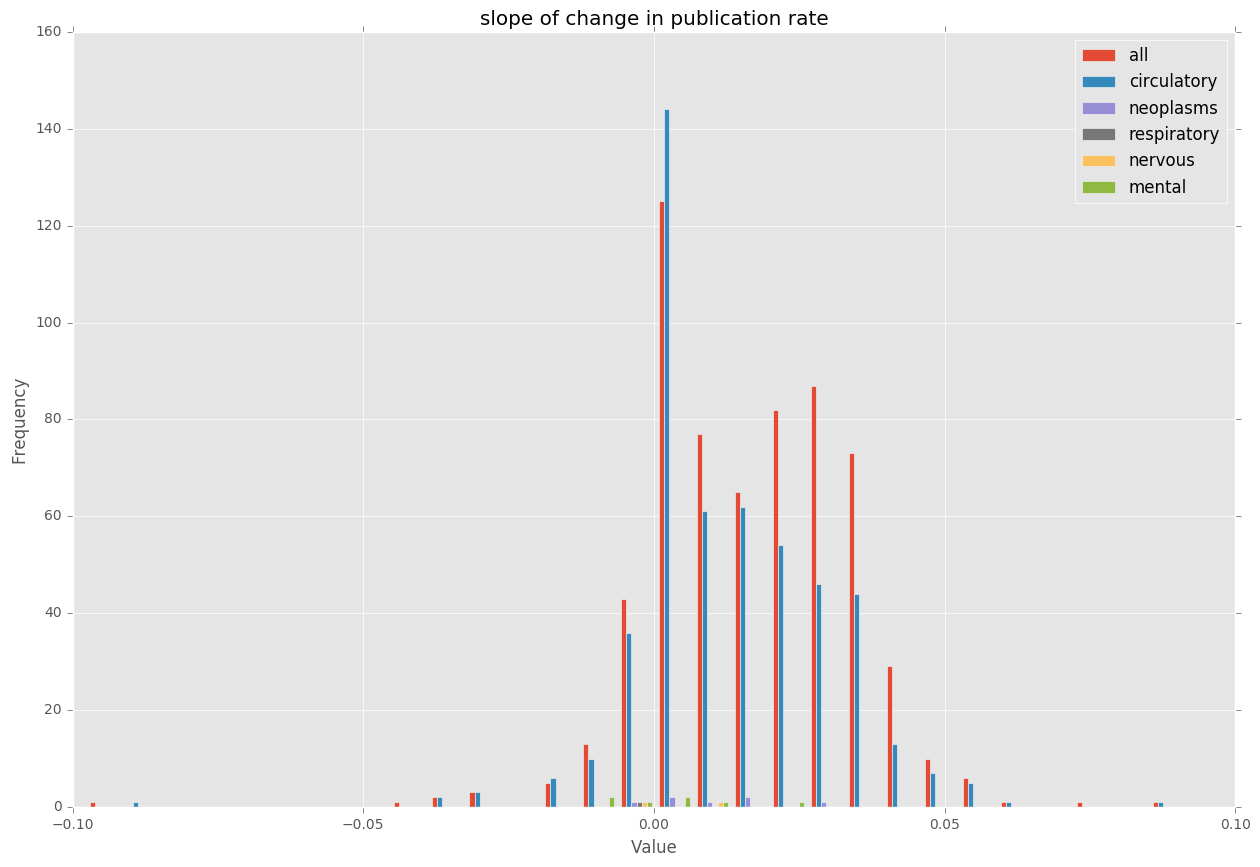

In [118]:
f, axs = plt.subplots(1,1, figsize=(15,10))
axs.hist(x=[mort.loc[(mort.cause == 'all') & (mort.delta_rate < -10) ,'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'circulatory')& (mort.delta_rate < -10),'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'neoplasms')& (mort.delta_rate < -10),'delta_pub'].drop_duplicates(), 
                    mort.loc[(mort.cause == 'respiratory')& (mort.delta_rate < -10),'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'nervous')& (mort.delta_rate < -10),'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'mental')& (mort.delta_rate < -10),'delta_pub'].drop_duplicates()], 
         bins=50, 
         stacked=False, 
         label=['all','circulatory','neoplasms','respiratory','nervous','mental'])
plt.title("slope of change in publication rate")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(-.1,.1)
plt.legend()

plt.show()

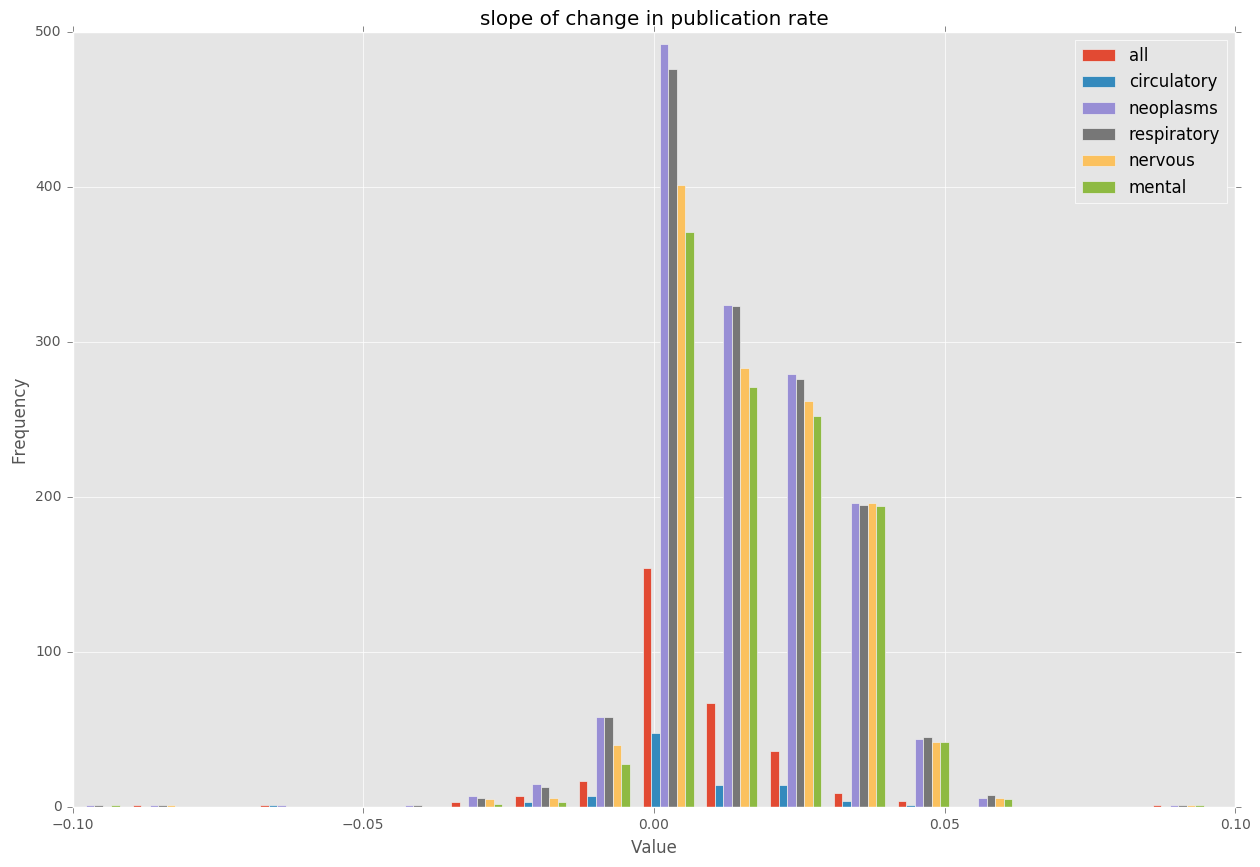

In [121]:
f, axs = plt.subplots(1,1, figsize=(15,10))
axs.hist(x=[mort.loc[(mort.cause == 'all') & (mort.delta_rate > -5) ,'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'circulatory')& (mort.delta_rate > -5),'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'neoplasms')& (mort.delta_rate > -5),'delta_pub'].drop_duplicates(), 
                    mort.loc[(mort.cause == 'respiratory')& (mort.delta_rate > -5),'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'nervous')& (mort.delta_rate > -5),'delta_pub'].drop_duplicates(),
                    mort.loc[(mort.cause == 'mental')& (mort.delta_rate > -5),'delta_pub'].drop_duplicates()], 
         bins=50, 
         stacked=False, 
         label=['all','circulatory','neoplasms','respiratory','nervous','mental'])
plt.title("slope of change in publication rate")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(-.1,.1)
plt.legend()

plt.show()

### Publications

In [11]:
# mdf.loc[pd.isnull(mdf.mesh_groups) == False, 'mesh_groups'] = \
# mdf.loc[pd.isnull(mdf.mesh_groups) == False, 'mesh_groups'].str.replace("'", "").str.replace(" ","").str[1:-1].str.split(',')

In [14]:
mdf.head()

PMID                                               mesh mesh_groups
0  26151948  Algorithms|Data Mining|Databases, Factual|Gene...         NaN
1  26151946  Adult|Aged|Aged, 80 and over|Decision Making|F...         NaN
2  26151944  Animals|Biomimetic Materials|Biomimetics|Equip...         NaN
3  26151942  Amino Acids|Anti-Bacterial Agents|Escherichia ...         NaN
4  26151941  Action Potentials|Electronics|Humans|Models, N...         NaN

In [10]:
mdf.loc[pd.isnull(mdf.mesh_groups) == False,:].head()

KeyboardInterrupt: 

In [15]:
mdf_nonull = mdf.loc[pd.isnull(mdf.mesh_groups) == False, ['PMID', 'mesh_groups']]
mdf_nonull.is_copy = False

In [16]:
mdf_nonull.head()

PMID          mesh_groups
13  26151929               mental
15  26151925               mental
16  26151924               mental
17  26151923       nervous,mental
32  26151900  nervous,circulatory

In [17]:
print(mdf.shape)
print(mdf_nonull.shape)
print(mdf.shape[0] - mdf_nonull.shape[0])

(23354735, 3)
(7567852, 2)
15786883


In [18]:
mapAffil.head()

PMID  au_order  year     type                          city state  \
0  26151952         1  2016      EDU               Tucson, AZ, USA    AZ   
1  26151951         1  2016      EDU          Los Angeles, CA, USA    CA   
2  26151950         1  2016      EDU  Manhattan, New York, NY, USA    NY   
3  26151925         3  2015  EDU-HOS               Boston, MA, USA    MA   
4  26151913         8  2015      ORG        San Francisco, CA, USA    CA   

  country     lat      lon   fips  
0     USA  32.222 -110.970  04019  
1     USA  34.053 -118.245  06037  
2     USA  40.790  -73.960  36061  
3     USA  42.359  -71.057  25025  
4     USA  37.779 -122.420  06075

In [8]:
mapAffil.PMID.nunique()

5760226

In [125]:
mapAffil.loc[mapAffil.year > 1987,'PMID'].nunique()

5182440

In [39]:
merge = pd.merge(mdf_nonull, mapAffil, how='right', on=['PMID'])


In [40]:
merge.head()

PMID          mesh_groups  au_order  year     type  \
0  26151925               mental         3  2015  EDU-HOS   
1  26151900  nervous,circulatory         1  2015      UNK   
2  26151864  nervous,circulatory         2  2015      EDU   
3  26151864  nervous,circulatory         9  2015      ORG   
4  26151864  nervous,circulatory        11  2015      EDU   

                             city state country     lat      lon   fips  
0                 Boston, MA, USA    MA     USA  42.359  -71.057  25025  
1             Bloomfield, NJ, USA    NJ     USA  40.792  -74.196  34013  
2  Westwood, Los Angeles, CA, USA    CA     USA  34.064 -118.446  06037  
3              Palo Alto, CA, USA    CA     USA  37.445 -122.161  06085  
4  Westwood, Los Angeles, CA, USA    CA     USA  34.064 -118.446  06037

In [51]:
mapAffil.loc[mapAffil.au_order == 1,:].shape

(5373119, 10)

In [20]:
# All in USA
merge.loc[merge.country != 'USA',:]

Empty DataFrame
Columns: [PMID, mesh_groups, au_order, year, type, city, state, country, lat, lon, fips]
Index: []

In [27]:
print(mapAffil.shape)
print("first authors in mapAffil:",mapAffil.loc[mapAffil.au_order == 1,:].shape)
print("rows in mapAffil with mesh_groups:",merge.loc[pd.isnull(merge.mesh_groups)==False,:].shape)
# print("unique PMID in mapAffil with mesh_groups:",merge.loc[pd.isnull(merge.mesh_groups)==False,['PMID']].drop_duplicates().shape)

(12191076, 10)
first authors in mapAffil: (5373119, 10)
rows in mapAffil with mesh_groups: (3046193, 11)
unique PMID in mapAffil with mesh_groups: (1513655, 1)


In [41]:
# if first:
# remove all authors that are not first author or year before 1987
# first = merge.loc[(merge.au_order == 1) & (merge.year > 1987), :]

# remove all years before 1987
merge = merge.loc[(merge.year > 1987),:]

In [42]:
print(np.sort(merge.year.unique()))

merge.type.unique()


[1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


array(['EDU-HOS', 'UNK', 'EDU', 'ORG', 'GOV', 'HOS', 'COM', 'MIL'], dtype=object)

In [62]:
print(first.shape)
print(first.loc[pd.isnull(first.mesh_groups) == False,:].shape)

(4922479, 11)
(1459767, 11)


In [92]:
# causes = ['circulatory', 'mental', 'neoplasms', 'nervous', 'respiratory']

# for cause in causes:
#     print(cause,':')
#     print(merge.loc[(pd.isnull(merge.mesh_groups)==False) & (merge.mesh_groups.str.find(cause) != -1) ,:].shape)

circulatory :


KeyboardInterrupt: 

In [63]:
# # first authors only
# for cause in causes:
#     print(cause,':')
#     print(first.loc[(first.mesh_groups.str.find(cause) != -1) & (pd.isnull(first.mesh_groups)==False),:].shape)

circulatory :
(361624, 11)
mental :
(263553, 11)
neoplasms :
(543263, 11)
nervous :
(434581, 11)
respiratory :
(185254, 11)


In [43]:
# merge or first
# split mesh_groups into list

merge.loc[(pd.isnull(merge.mesh_groups) == False),'mesh_groups'] = merge.loc[(pd.isnull(merge.mesh_groups) == False),'mesh_groups'].str.split(',')

# cast types into list

merge.loc[(pd.isnull(merge.type) == False),'type'] = merge.loc[(pd.isnull(merge.type) == False),'type'].str.split(',')
merge.head(10)

PMID             mesh_groups  au_order  year       type  \
0  26151925                [mental]         3  2015  [EDU-HOS]   
1  26151900  [nervous, circulatory]         1  2015      [UNK]   
2  26151864  [nervous, circulatory]         2  2015      [EDU]   
3  26151864  [nervous, circulatory]         9  2015      [ORG]   
4  26151864  [nervous, circulatory]        11  2015      [EDU]   
5  26151861                [mental]         1  2015      [EDU]   
6  26151861                [mental]         2  2015      [EDU]   
7  26151861                [mental]         3  2015      [GOV]   
8  26151861                [mental]         4  2015      [EDU]   
9  26151850             [neoplasms]         1  2015      [EDU]   

                             city state country     lat      lon   fips  
0                 Boston, MA, USA    MA     USA  42.359  -71.057  25025  
1             Bloomfield, NJ, USA    NJ     USA  40.792  -74.196  34013  
2  Westwood, Los Angeles, CA, USA    CA     USA  34.064 -118.446  06037  
3              Palo Alto, CA, USA    CA     USA  37.445 -122.161  06085  
4  Westwood, Los Angeles, CA, USA    CA     USA  34.064 -118.446  06037  
5             Starkville, MS, USA    MS     USA  33.466  -88.813  28105  
6             Starkville, MS, USA    MS     USA  33.466  -88.813  28105  
7                Jackson, MS, USA    MS     USA  32.299  -90.181  28049  
8             Starkville, MS, USA    MS     USA  33.466  -88.813  28105  
9                Detroit, MI, USA    MI     USA  42.332  -83.048  26163

In [45]:
merge.loc[merge.PMID == '26151864',:]

PMID             mesh_groups  au_order  year   type  \
2  26151864  [nervous, circulatory]         2  2015  [EDU]   
3  26151864  [nervous, circulatory]         9  2015  [ORG]   
4  26151864  [nervous, circulatory]        11  2015  [EDU]   

                             city state country     lat      lon   fips  
2  Westwood, Los Angeles, CA, USA    CA     USA  34.064 -118.446  06037  
3              Palo Alto, CA, USA    CA     USA  37.445 -122.161  06085  
4  Westwood, Los Angeles, CA, USA    CA     USA  34.064 -118.446  06037

In [46]:
# # Use either merge or first
# # convert nulls to empty lists for summing counter objects
for row in merge.loc[merge.mesh_groups.isnull(), 'mesh_groups'].index:
    merge.at[row, 'mesh_groups'] = [np.nan]
    
# # convert nulls to empty lists for summing counter objects
for row in merge.loc[merge.type.isnull(), 'type'].index:
    merge.at[row, 'type'] = [np.nan]

In [51]:
def count_groups_PMID(x):
    return pd.Series(dict(
        mesh_groups = list(set(x['mesh_groups'].sum())),
        type_groups = list(set(x['type'].sum()))))

def count_groups_papers(x):
    return pd.Series(dict(
        PMID_count = x['PMID'].nunique(),
        mesh_groups = Counter(x['mesh_groups'].sum()),
        type_groups = Counter(x['type_groups'].sum())))

def count_groups_authors(x):
    return pd.Series(dict(
        #count rows, authors instead of unqiue papers
        author_count = len(x),
        mesh_groups = Counter(x['mesh_groups'].sum()),
        type_groups = Counter(x['type'].sum())))

In [52]:
count_authors_mesh_groups = merge.groupby(['fips','year']).apply(count_groups_authors)

In [53]:
count_PMID_by_groups = merge.groupby(['fips','year', 'PMID']).apply(count_groups_PMID)
count_PMID_by_groups = count_PMID_by_groups.reset_index()
count_PMID_mesh_groups = count_PMID_by_groups.groupby(['fips','year']).apply(count_groups_papers)

In [68]:
count_authors_mesh_groups = count_authors_mesh_groups.reset_index()
count_PMID_mesh_groups = count_PMID_mesh_groups.reset_index()

In [66]:
count_PMID_mesh_groups.head()

fips  year  PMID_count               mesh_groups type_groups  neoplasms  \
0  01001  1992           2  {nan: 1, 'neoplasms': 1}  {'HOS': 2}        1.0   
1  01001  2016           1                  {nan: 1}  {'UNK': 1}        NaN   
2  01003  1989           1                  {nan: 1}  {'HOS': 1}        NaN   
3  01003  1990           1                  {nan: 1}  {'UNK': 1}        NaN   
4  01003  1993           1                  {nan: 1}  {'COM': 1}        NaN   

   neoplasms_pct  circulatory  circulatory_pct  nervous  nervous_pct  mental  \
0            0.5          NaN              NaN      NaN          NaN     NaN   
1            NaN          NaN              NaN      NaN          NaN     NaN   
2            NaN          NaN              NaN      NaN          NaN     NaN   
3            NaN          NaN              NaN      NaN          NaN     NaN   
4            NaN          NaN              NaN      NaN          NaN     NaN   

   mental_pct  respiratory  respiratory_pct  
0         NaN          NaN              NaN  
1         NaN          NaN              NaN  
2         NaN          NaN              NaN  
3         NaN          NaN              NaN  
4         NaN          NaN              NaN

In [69]:
pd.set_option('max_colwidth',1000)
count_authors_mesh_groups.head()

fips  year  author_count               mesh_groups type_groups
0  01001  1992             2  {nan: 1, 'neoplasms': 1}  {'HOS': 2}
1  01001  2016             1                  {nan: 1}  {'UNK': 1}
2  01003  1989             1                  {nan: 1}  {'HOS': 1}
3  01003  1990             1                  {nan: 1}  {'UNK': 1}
4  01003  1993             1                  {nan: 1}  {'COM': 1}

In [105]:
count_authors_mesh_groups.to_csv('./data/count_authors_mesh_groups.tsv', sep='\t', index=False)

In [102]:
count_PMID_mesh_groups.to_csv('./data/count_PMID_mesh_groups.tsv', sep='\t', index=False)

In [103]:
for idx,row in count_PMID_mesh_groups.iterrows():
    for k,v in dict(row['mesh_groups']).items():
        if (len(dict(row['mesh_groups']).items()) == 1) & (type(k) == np.float):
            count_PMID_mesh_groups.loc[idx,'no_mesh'] = True
            count_PMID_mesh_groups.loc[idx, 'nan'] = v
        elif k == 'circulatory':
            count_PMID_mesh_groups.loc[idx, 'circulatory'] = v
            count_PMID_mesh_groups.loc[idx, 'circulatory_pct'] = v/count_PMID_mesh_groups.loc[idx,'PMID_count']
        elif k == 'nervous':
            count_PMID_mesh_groups.loc[idx, 'nervous'] = v
            count_PMID_mesh_groups.loc[idx, 'nervous_pct'] = v/count_PMID_mesh_groups.loc[idx,'PMID_count']
        elif k == 'mental':
            count_PMID_mesh_groups.loc[idx, 'mental'] = v
            count_PMID_mesh_groups.loc[idx, 'mental_pct'] = v/count_PMID_mesh_groups.loc[idx,'PMID_count']
        elif k == 'neoplasms':
            count_PMID_mesh_groups.loc[idx, 'neoplasms'] = v
            count_PMID_mesh_groups.loc[idx, 'neoplasms_pct'] = v/count_PMID_mesh_groups.loc[idx,'PMID_count']
        elif k == 'respiratory':
            count_PMID_mesh_groups.loc[idx, 'respiratory'] = v
            count_PMID_mesh_groups.loc[idx, 'respiratory_pct'] = v/count_PMID_mesh_groups.loc[idx,'PMID_count']
        elif type(k) == np.float:
            count_PMID_mesh_groups.loc[idx, 'nan'] = v
        else:
            continue


# authors
for idx,row in count_authors_mesh_groups.iterrows():
    for k,v in dict(row['mesh_groups']).items():
        if (len(dict(row['mesh_groups']).items()) == 1) & (type(k) == np.float):
            count_authors_mesh_groups.loc[idx,'no_mesh'] = True
#             count_authors_mesh_groups.loc[idx, 'nan'] = v
        elif k == 'circulatory':
            count_authors_mesh_groups.loc[idx, 'circulatory'] = v
            count_authors_mesh_groups.loc[idx, 'circulatory_pct'] = v/count_authors_mesh_groups.loc[idx,'author_count']
        elif k == 'nervous':
            count_authors_mesh_groups.loc[idx, 'nervous'] = v
            count_authors_mesh_groups.loc[idx, 'nervous_pct'] = v/count_authors_mesh_groups.loc[idx,'author_count']
        elif k == 'mental':
            count_authors_mesh_groups.loc[idx, 'mental'] = v
            count_authors_mesh_groups.loc[idx, 'mental_pct'] = v/count_authors_mesh_groups.loc[idx,'author_count']
        elif k == 'neoplasms':
            count_authors_mesh_groups.loc[idx, 'neoplasms'] = v
            count_authors_mesh_groups.loc[idx, 'neoplasms_pct'] = v/count_authors_mesh_groups.loc[idx,'author_count']
        elif k == 'respiratory':
            count_authors_mesh_groups.loc[idx, 'respiratory'] = v
            count_authors_mesh_groups.loc[idx, 'respiratory_pct'] = v/count_authors_mesh_groups.loc[idx,'author_count']
        elif type(k) == np.float:
            count_authors_mesh_groups.loc[idx, 'nan'] = v
        else:
            continue

In [124]:
print("Number of authors with affiliations:")
print(mapAffil.loc[(mapAffil.year > 1987),:].shape)
print(merge.shape)
print(count_authors_mesh_groups.loc[:,'author_count'].sum())
print("Number of authors with mesh_groups:")
print(count_authors_mesh_groups.loc[count_authors_mesh_groups.no_mesh != True,'author_count'].sum())
print("Number of authors with mesh_groups where author count > 10:")
print(count_authors_mesh_groups.loc[(count_authors_mesh_groups.no_mesh != True) & (count_authors_mesh_groups.author_count > 10),'author_count'].sum())

Number of authors with affiliations:
(11114789, 10)
(11114789, 11)
11114789
Number of authors with mesh_groups:
11058983
Number of authors with mesh_groups where author count > 10:
11031263


In [112]:
print("Number of papers with affiliations:")
print(count_PMID_mesh_groups.loc[:,'PMID_count'].sum())
print("Number of papers with mesh_groups:")
print(count_PMID_mesh_groups.loc[count_PMID_mesh_groups.no_mesh != True,'PMID_count'].sum())
print("Number of papers with mesh_groups where PMID count > 10:")
print(count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.no_mesh != True) & (count_PMID_mesh_groups.PMID_count > 10),'PMID_count'].sum())

# this doesn't reflect nulls anymore, nans are included in Counter
# print(count_PMID_mesh_groups.loc[count_PMID_mesh_groups.mesh_groups != Counter(),:].shape)
# print(count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.mesh_groups != Counter()) & (count_PMID_mesh_groups.PMID_count > 10),:].shape)

Number of papers with affiliations:
5985192
Number of papers with mesh_groups:
5945192
Number of papers with mesh_groups where PMID count > 10:
5915613


In [4]:
count_authors_mesh_groups = pd.read_csv('./data/count_authors_mesh_groups.tsv', sep='\t')

In [5]:
count_authors_mesh_groups.head(10)

fips  year  author_count                                mesh_groups  \
0  1001  1992             2          Counter({nan: 1, 'neoplasms': 1})   
1  1001  2016             1                          Counter({nan: 1})   
2  1003  1989             1                          Counter({nan: 1})   
3  1003  1990             1                          Counter({nan: 1})   
4  1003  1993             1                          Counter({nan: 1})   
5  1003  1994             1                          Counter({nan: 1})   
6  1003  1995             3  Counter({'circulatory': 2, 'nervous': 1})   
7  1003  1996             2                          Counter({nan: 2})   
8  1003  1997             2                          Counter({nan: 2})   
9  1003  2000             2                     Counter({'mental': 2})   

                     type_groups  neoplasms  neoplasms_pct  circulatory  \
0            Counter({'HOS': 2})        1.0            0.5          NaN   
1            Counter({'UNK': 1})        NaN            NaN          NaN   
2            Counter({'HOS': 1})        NaN            NaN          NaN   
3            Counter({'UNK': 1})        NaN            NaN          NaN   
4            Counter({'COM': 1})        NaN            NaN          NaN   
5            Counter({'UNK': 1})        NaN            NaN          NaN   
6  Counter({'COM': 2, 'HOS': 1})        NaN            NaN          2.0   
7            Counter({'ORG': 2})        NaN            NaN          NaN   
8  Counter({'COM': 1, 'ORG': 1})        NaN            NaN          NaN   
9            Counter({'ORG': 2})        NaN            NaN          NaN   

   circulatory_pct  nervous  nervous_pct  mental  mental_pct  respiratory  \
0              NaN      NaN          NaN     NaN         NaN          NaN   
1              NaN      NaN          NaN     NaN         NaN          NaN   
2              NaN      NaN          NaN     NaN         NaN          NaN   
3              NaN      NaN          NaN     NaN         NaN          NaN   
4              NaN      NaN          NaN     NaN         NaN          NaN   
5              NaN      NaN          NaN     NaN         NaN          NaN   
6         0.666667      1.0     0.333333     NaN         NaN          NaN   
7              NaN      NaN          NaN     NaN         NaN          NaN   
8              NaN      NaN          NaN     NaN         NaN          NaN   
9              NaN      NaN          NaN     2.0         1.0          NaN   

   respiratory_pct  nan no_mesh  
0              NaN  1.0     NaN  
1              NaN  1.0    True  
2              NaN  1.0    True  
3              NaN  1.0    True  
4              NaN  1.0    True  
5              NaN  1.0    True  
6              NaN  NaN     NaN  
7              NaN  2.0    True  
8              NaN  2.0    True  
9              NaN  NaN     NaN

In [116]:
count_PMID_mesh_groups.head(10)

fips  year  PMID_count                       mesh_groups  \
0  01001  1992           2          {nan: 1, 'neoplasms': 1}   
1  01001  2016           1                          {nan: 1}   
2  01003  1989           1                          {nan: 1}   
3  01003  1990           1                          {nan: 1}   
4  01003  1993           1                          {nan: 1}   
5  01003  1994           1                          {nan: 1}   
6  01003  1995           2  {'circulatory': 1, 'nervous': 1}   
7  01003  1996           2                          {nan: 2}   
8  01003  1997           2                          {nan: 2}   
9  01003  2000           2                     {'mental': 2}   

            type_groups  neoplasms  neoplasms_pct  circulatory  \
0            {'HOS': 2}        1.0            0.5          NaN   
1            {'UNK': 1}        NaN            NaN          NaN   
2            {'HOS': 1}        NaN            NaN          NaN   
3            {'UNK': 1}        NaN            NaN          NaN   
4            {'COM': 1}        NaN            NaN          NaN   
5            {'UNK': 1}        NaN            NaN          NaN   
6  {'COM': 1, 'HOS': 1}        NaN            NaN          1.0   
7            {'ORG': 2}        NaN            NaN          NaN   
8  {'COM': 1, 'ORG': 1}        NaN            NaN          NaN   
9            {'ORG': 2}        NaN            NaN          NaN   

   circulatory_pct  nervous  nervous_pct  mental  mental_pct  respiratory  \
0              NaN      NaN          NaN     NaN         NaN          NaN   
1              NaN      NaN          NaN     NaN         NaN          NaN   
2              NaN      NaN          NaN     NaN         NaN          NaN   
3              NaN      NaN          NaN     NaN         NaN          NaN   
4              NaN      NaN          NaN     NaN         NaN          NaN   
5              NaN      NaN          NaN     NaN         NaN          NaN   
6              0.5      1.0          0.5     NaN         NaN          NaN   
7              NaN      NaN          NaN     NaN         NaN          NaN   
8              NaN      NaN          NaN     NaN         NaN          NaN   
9              NaN      NaN          NaN     2.0         1.0          NaN   

   respiratory_pct no_mesh  nan  
0              NaN     NaN  1.0  
1              NaN    True  1.0  
2              NaN    True  1.0  
3              NaN    True  1.0  
4              NaN    True  1.0  
5              NaN    True  1.0  
6              NaN     NaN  NaN  
7              NaN    True  2.0  
8              NaN    True  2.0  
9              NaN     NaN  NaN

In [118]:
count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,:].sort_values(by='PMID_count', axis=0, ascending=False).head()

fips  year  PMID_count  \
11713  25025  2016       22637   
11712  25025  2015       22265   
11711  25025  2014       19985   
17396  36061  2016       19753   
17395  36061  2015       19214   

                                                                                                      mesh_groups  \
11713       {nan: 20754, 'circulatory': 574, 'respiratory': 250, 'nervous': 518, 'mental': 268, 'neoplasms': 786}   
11712  {nan: 13557, 'circulatory': 2536, 'respiratory': 1123, 'nervous': 2408, 'mental': 1421, 'neoplasms': 3351}   
11711  {nan: 12007, 'circulatory': 2371, 'respiratory': 1027, 'nervous': 2155, 'mental': 1374, 'neoplasms': 3024}   
17396       {nan: 18279, 'circulatory': 352, 'respiratory': 183, 'nervous': 360, 'mental': 242, 'neoplasms': 676}   
17395   {nan: 12151, 'circulatory': 1768, 'respiratory': 686, 'nervous': 1772, 'mental': 1346, 'neoplasms': 3032}   

                                                                                                  type_groups  \
11713   {'MIL': 2, 'GOV': 18, 'UNK': 438, 'EDU': 8793, 'COM': 361, 'HOS': 6758, 'EDU-HOS': 9447, 'ORG': 1261}   
11712   {'MIL': 6, 'GOV': 26, 'UNK': 395, 'EDU': 8759, 'COM': 387, 'HOS': 6422, 'EDU-HOS': 9147, 'ORG': 1148}   
11711   {'MIL': 4, 'GOV': 23, 'UNK': 360, 'EDU': 7884, 'COM': 263, 'HOS': 5772, 'EDU-HOS': 8076, 'ORG': 1037}   
17396  {'MIL': 2, 'GOV': 96, 'UNK': 934, 'EDU': 11064, 'COM': 537, 'HOS': 4076, 'EDU-HOS': 4470, 'ORG': 1298}   
17395  {'MIL': 7, 'GOV': 84, 'UNK': 788, 'EDU': 11045, 'COM': 488, 'HOS': 3626, 'EDU-HOS': 4082, 'ORG': 1268}   

       neoplasms  neoplasms_pct  circulatory  circulatory_pct  nervous  \
11713      786.0       0.034722        574.0         0.025357    518.0   
11712     3351.0       0.150505       2536.0         0.113901   2408.0   
11711     3024.0       0.151313       2371.0         0.118639   2155.0   
17396      676.0       0.034223        352.0         0.017820    360.0   
17395     3032.0       0.157802       1768.0         0.092016   1772.0   

       nervous_pct  mental  mental_pct  respiratory  respiratory_pct no_mesh  \
11713     0.022883   268.0    0.011839        250.0         0.011044     NaN   
11712     0.108152  1421.0    0.063822       1123.0         0.050438     NaN   
11711     0.107831  1374.0    0.068752       1027.0         0.051389     NaN   
17396     0.018225   242.0    0.012251        183.0         0.009264     NaN   
17395     0.092224  1346.0    0.070053        686.0         0.035703     NaN   

           nan  
11713  20754.0  
11712  13557.0  
11711  12007.0  
17396  18279.0  
17395  12151.0

In [122]:
causes = ['circulatory', 'mental', 'neoplasms', 'nervous', 'respiratory']

for cause in causes:
    print('# authors associated with',cause,':')
    print(count_authors_mesh_groups.loc[:,cause].sum())

# authors associated with circulatory :
711840.0
# authors associated with mental :
530092.0
# authors associated with neoplasms :
1231856.0
# authors associated with nervous :
873744.0
# authors associated with respiratory :
381050.0


In [127]:
for cause in causes:
    print('# papers for each FIPS associated with',cause,':')
    print(count_PMID_mesh_groups.loc[:,cause].sum())

# papers for each FIPS associated with circulatory :
422011.0
# papers for each FIPS associated with mental :
313480.0
# papers for each FIPS associated with neoplasms :
643416.0
# papers for each FIPS associated with nervous :
507570.0
# papers for each FIPS associated with respiratory :
217231.0


<b>Plot histograms of the pcts of the 5 categories, with author and PMID proportions (over 10 authors/papers)</b>

In [148]:
years = np.sort(count_PMID_mesh_groups.year.unique())

print(years)

by_year = ["count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year == {}),'PMID_count']".format(year) for year in years]
by_year = [count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year == year),'PMID_count'] for year in years]

by_year

[1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


[79          3
 164       820
 221       142
 266        11
 295        30
 331       154
 360         7
 405         2
 430         1
 474        54
 511        17
 568        13
 779         1
 801        13
 841       354
 881         1
 899       731
 1009        1
 1136        2
 1164        1
 1225       72
 1280        3
 1296        1
 1316      248
 1353        1
 1388       58
 1435     1315
 1485        5
 1524       56
 1583       35
          ... 
 29614       1
 29632       1
 29678       4
 29707      20
 29764       1
 29809     745
 29883       1
 29912       4
 29939       4
 30000       6
 30032       2
 30065       1
 30076       1
 30115       1
 30172       5
 30201       3
 30220       4
 30249      18
 30278      52
 30323       1
 30340       3
 30368       3
 30531       3
 30598       1
 30612       6
 30655       2
 30698       2
 30728       1
 30783      93
 30835       1
 Name: PMID_count, dtype: int64, 2          1
 21         1
 50         2
 80        

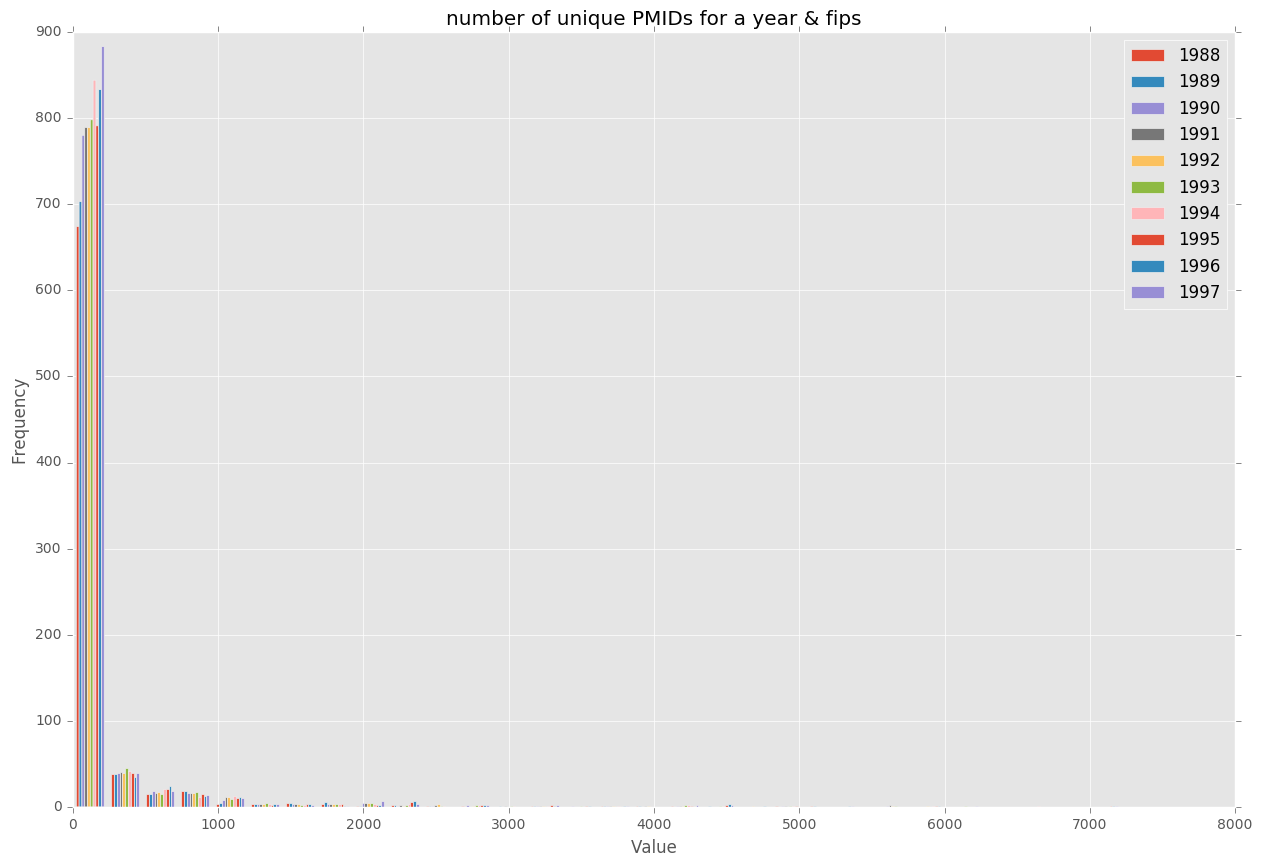

In [154]:
f, axs = plt.subplots(1,1, figsize=(15,10))

years = np.sort(count_PMID_mesh_groups.year.unique())
by_year = [count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year == year),'PMID_count'] for year in years]

# print(by_year[:3])
# print(list(years[:3]))

axs.hist(x=by_year[:10],
         stacked=False, 
         bins=30, 
         label=list(years[:10]))

axs.set_title("number of unique PMIDs for a year & fips")
axs.set_xlabel("Value")
axs.set_ylabel("Frequency")
# axs.set_xlim(0,5000)
axs.legend(loc='best')
plt.show()

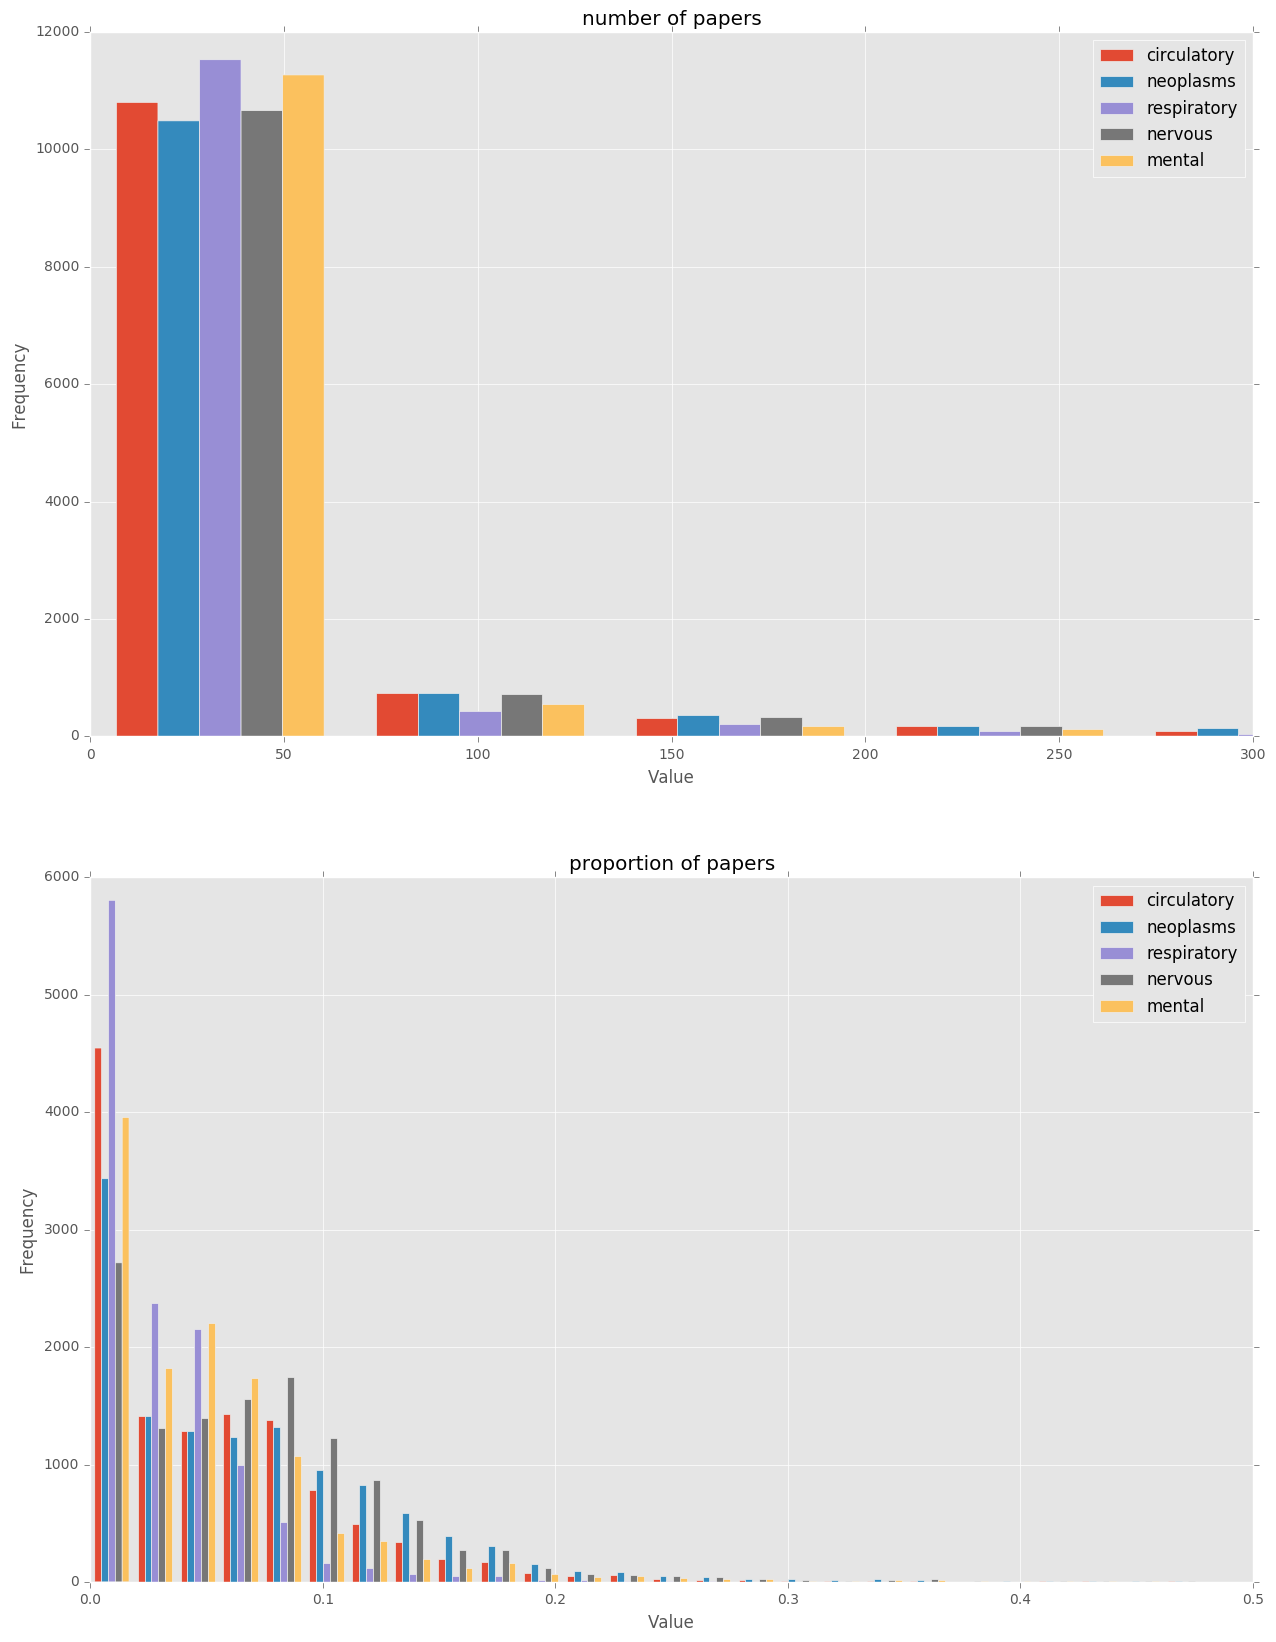

In [156]:
f, axs = plt.subplots(2,1, figsize=(15,20))

axs[0].hist(x=[count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'circulatory'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'neoplasms'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'respiratory'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'nervous'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'mental'].fillna(0)],
         stacked=False, 
         bins=50,
         label=['circulatory','neoplasms','respiratory','nervous','mental'])

axs[0].set_title("number of papers")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim(0,300)
axs[0].legend()

axs[1].hist(x=[count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'circulatory_pct'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'neoplasms_pct'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'respiratory_pct'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'nervous_pct'].fillna(0),
            count_PMID_mesh_groups.loc[count_PMID_mesh_groups.PMID_count > 10,'mental_pct'].fillna(0)],
         stacked=False, 
         bins=50,
         label=['circulatory','neoplasms','respiratory','nervous','mental'])
axs[1].set_title("proportion of papers")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim(0,0.5)
axs[1].legend()

plt.show()

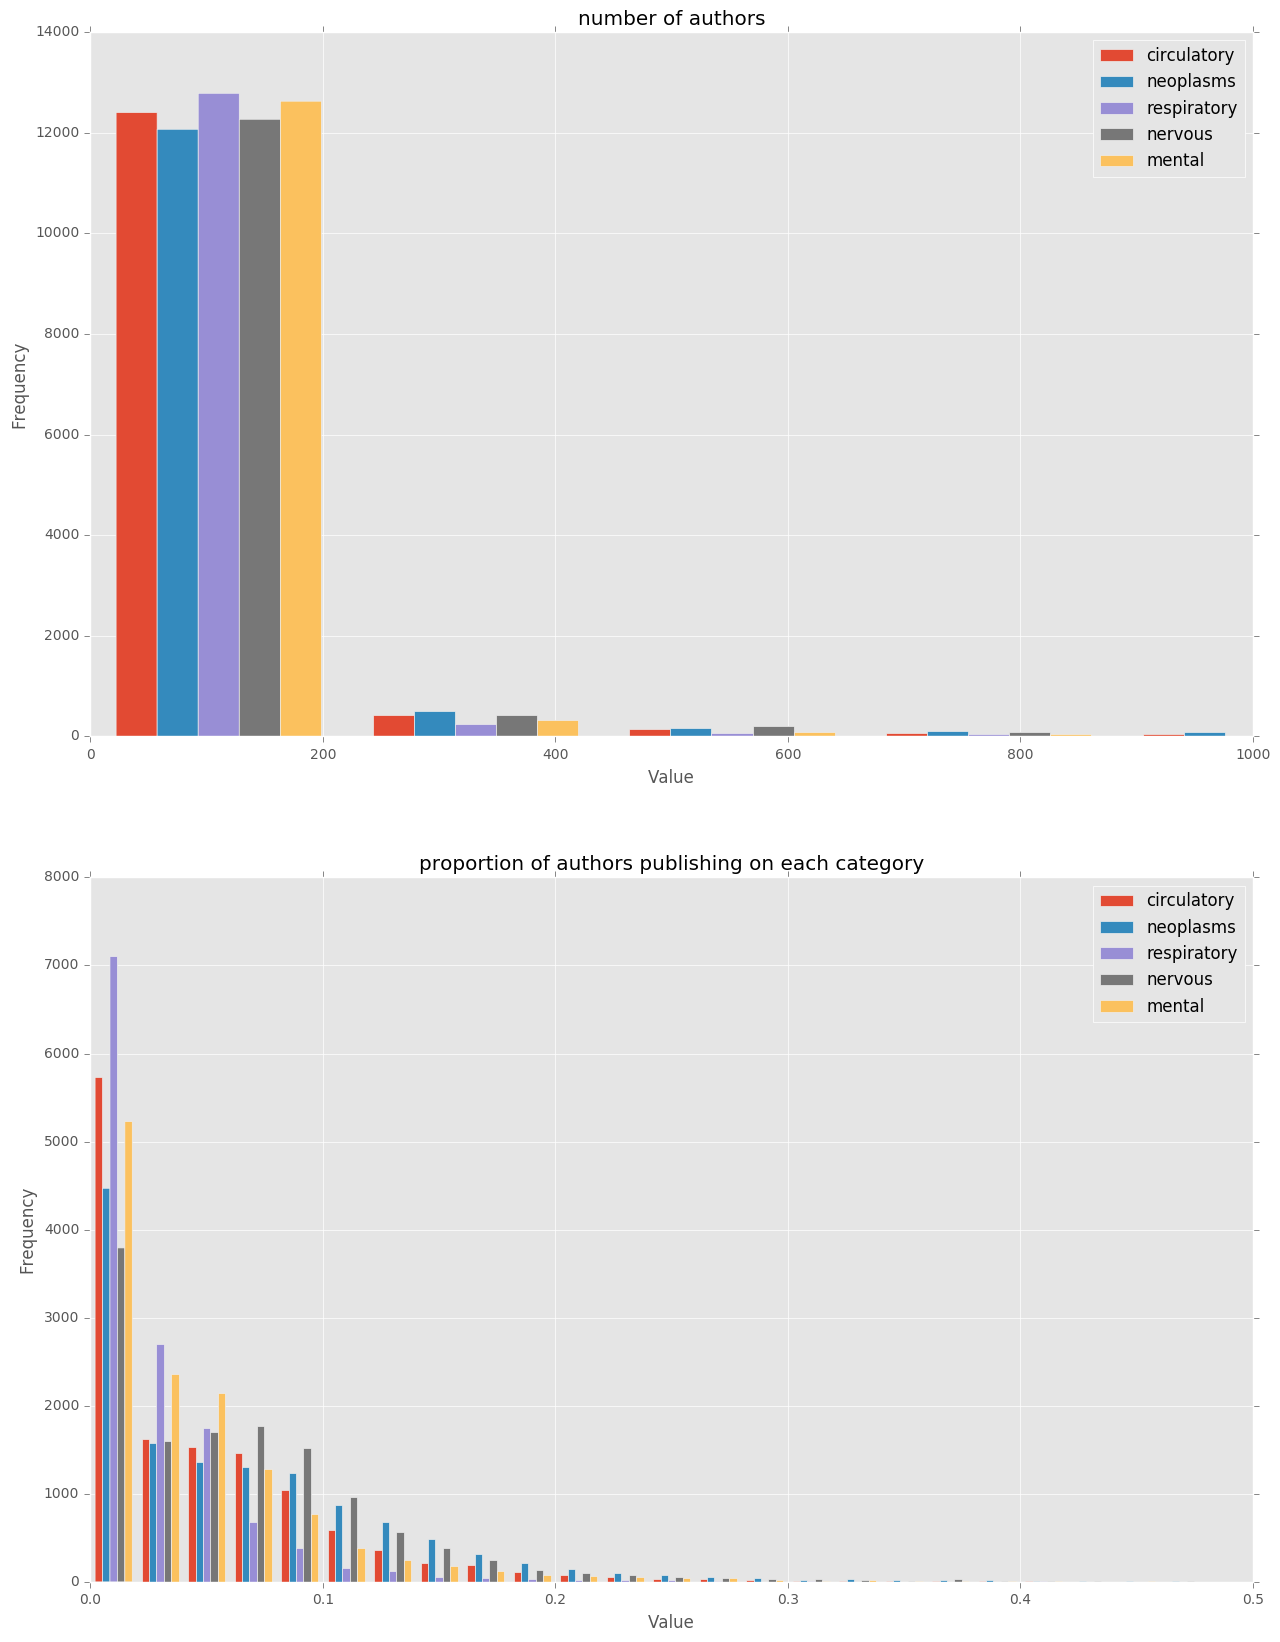

In [159]:
f, axs = plt.subplots(2,1, figsize=(15,20))

axs[0].hist(x=[count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'circulatory'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'neoplasms'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'respiratory'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'nervous'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'mental'].fillna(0)],
         stacked=False, 
         bins=50,
         label=['circulatory','neoplasms','respiratory','nervous','mental'])

axs[0].set_title("number of authors")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim(0,1000)
axs[0].legend()

axs[1].hist(x=[count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'circulatory_pct'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'neoplasms_pct'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'respiratory_pct'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'nervous_pct'].fillna(0),
            count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count > 10,'mental_pct'].fillna(0)],
         stacked=False, 
         bins=50,
         label=['circulatory','neoplasms','respiratory','nervous','mental'])
axs[1].set_title("proportion of authors publishing on each category")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim(0,0.5)
axs[1].legend()

plt.show()

In [160]:
vincent.core.initialize_notebook()

county_topo = './data/vincent_map_data-master/us_counties.topo.json'
state_topo = './data/vincent_map_data-master/us_states.topo.json'

geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'},
            {'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}
             ]

vis = vincent.Map(geo_data=geo_data, scale=1000, projection='albersUsa')
#Get rid of State fill, customize stroke color
del vis.marks[1].properties.update
vis.marks[0].properties.update.fill.value = '#084081'
vis.marks[1].properties.enter.stroke.value = '#fff'
vis.marks[0].properties.enter.stroke.value = '#7bccc4'

vis.display()

In [ ]:

#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('./data/vincent_map_data-master/us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code type casting to ensure keys match
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('./data/vincent_map_data-master/us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'fips': county_codes}, dtype=str)
county_df = county_df.astype(int)

# Read county unemployment data into Dataframe, cast to int for consistency
df = count_authors_mesh_groups.loc[(count_authors_mesh_groups.author_count > 10),:]
# df = count_PMID_mesh_groups
df['fips'] = df['fips'].astype(int)

#Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(df, county_df, on='fips', how='right')
# merged_pad = merged.fillna(method='pad')
merged_na = merged.fillna(0)

In [194]:
county_df.head()

fips
0  22051
1  53073
2  30105
3  30029
4  16021

In [114]:
merged_na.sort_values(by = 'circulatory', axis=0, ascending=False)

fips    year  PMID_count  \
4936   25025.0  2015.0     22265.0   
4935   25025.0  2014.0     19985.0   
7326   36061.0  2015.0     19214.0   
4934   25025.0  2013.0     16266.0   
7325   36061.0  2014.0     17236.0   
4933   25025.0  2012.0     15257.0   
4931   25025.0  2010.0     12619.0   
4930   25025.0  2009.0     11899.0   
4932   25025.0  2011.0     13716.0   
4645   24510.0  2015.0     11878.0   
9579   42101.0  2015.0     11296.0   
5545   27109.0  2015.0      4887.0   
663     6037.0  2015.0     13175.0   
2865   17031.0  2015.0     12655.0   
9578   42101.0  2014.0      9965.0   
4929   25025.0  2008.0     11306.0   
4644   24510.0  2014.0     10201.0   
662     6037.0  2014.0     11645.0   
10613  48201.0  2015.0     10120.0   
7324   36061.0  2013.0     14011.0   
5544   27109.0  2014.0      4251.0   
2864   17031.0  2014.0     11116.0   
8298   39035.0  2015.0      5364.0   
7323   36061.0  2012.0     12878.0   
7889   37063.0  2015.0      6670.0   
10612  48201.0  2014.0      8771.0   
7888   37063.0  2014.0      6091.0   
7322   36061.0  2011.0     11597.0   
4937   25025.0  2016.0     22637.0   
2503   13121.0  2015.0      8015.0   
...        ...     ...         ...   
7679   36101.0  2016.0        21.0   
7678   36101.0  2015.0        22.0   
7677   36101.0  2014.0        24.0   
7676   36101.0  2013.0        17.0   
7794   37021.0  1996.0        22.0   
7800   37021.0  2002.0        19.0   
7843   37051.0  1995.0        13.0   
7801   37021.0  2003.0        21.0   
7842   37051.0  1994.0        12.0   
7839   37031.0  2016.0        45.0   
7838   37031.0  2015.0        39.0   
7837   37031.0  2014.0        56.0   
7836   37031.0  2013.0        34.0   
7835   37031.0  2012.0        29.0   
7833   37031.0  2010.0        14.0   
7832   37031.0  2009.0        14.0   
7831   37031.0  2008.0        26.0   
7830   37031.0  2007.0        18.0   
7829   37031.0  2006.0        21.0   
7828   37031.0  2005.0        14.0   
7827   37031.0  2004.0        15.0   
7826   37031.0  2003.0        19.0   
7825   37031.0  2002.0        14.0   
7824   37031.0  1992.0        11.0   
7823   37031.0  1991.0        12.0   
7822   37025.0  2016.0        67.0   
7819   37025.0  2013.0        73.0   
7804   37021.0  2006.0        29.0   
7802   37021.0  2004.0        25.0   
15190  72051.0     0.0         0.0   

                                             mesh_groups  neoplasms  \
4936   {'nervous': 7400, 'circulatory': 7786, 'respir...    11038.0   
4935   {'nervous': 6186, 'circulatory': 7009, 'respir...    10092.0   
7326   {'nervous': 4714, 'circulatory': 4758, 'respir...    10047.0   
4934   {'nervous': 4497, 'circulatory': 4564, 'respir...     6766.0   
7325   {'nervous': 4284, 'circulatory': 4408, 'respir...     8294.0   
4933   {'nervous': 4686, 'circulatory': 4378, 'respir...     6101.0   
4931   {'nervous': 3504, 'circulatory': 4021, 'respir...     5257.0   
4930   {'nervous': 3384, 'circulatory': 3903, 'respir...     5092.0   
4932   {'nervous': 3668, 'circulatory': 3876, 'respir...     5759.0   
4645   {'nervous': 3676, 'circulatory': 3510, 'respir...     5170.0   
9579   {'nervous': 3186, 'circulatory': 3139, 'respir...     4921.0   
5545   {'nervous': 1950, 'circulatory': 3026, 'respir...     3436.0   
663    {'nervous': 3363, 'circulatory': 2955, 'respir...     6161.0   
2865   {'nervous': 3025, 'circulatory': 2930, 'respir...     4119.0   
9578   {'nervous': 3081, 'circulatory': 2915, 'respir...     3885.0   
4929   {'nervous': 2621, 'circulatory': 2887, 'respir...     4040.0   
4644   {'nervous': 3083, 'circulatory': 2760, 'respir...     4134.0   
662    {'nervous': 2734, 'circulatory': 2598, 'respir...     4655.0   
10613  {'nervous': 2685, 'circulatory': 2561, 'respir...    11002.0   
7324   {'nervous': 2756, 'circulatory': 2559, 'respir...     5932.0   
5544   {'nervous': 1750, 'circulatory': 2471, 'respir...     2688.0   
2864   {'nervous': 2683, 'circulatory': 2399, 'respir...     3327.0   
8298   {'nervous': 1

In [174]:
# make new merged df with all fips codes for plotting



/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [162]:
%%time 

def plot_map(year, column):
    
#     df = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.PMID_count > 10) & (count_PMID_mesh_groups.year == year),[column, 'fips']]
#     df['fips'] = df['fips'].astype(int)

#     #Perform an inner join, pad NA's with data from nearest county
#     merged = pd.merge(df, county_df, on='fips', how='right')
#     # merged_pad = merged.fillna(method='pad')
#     merged_na = merged.fillna(0)

    df = merged_na.loc[merged_na.year == year,[column, 'fips']]

    geo_data = [{'name': 'counties',
                 'url': county_topo,
                 'feature': 'us_counties.geo'}]
    
    vis = vincent.Map(data=merged_na, geo_data=geo_data, scale=2100, 
                      brew='YlGnBu',
                      projection='albersUsa', data_bind=column,
                      data_key='fips', map_key={'counties': 'properties.FIPS'})
    vis.marks[0].properties.enter.stroke_opacity = vincent.ValueRef(value=0.5)
    #Change our domain for an even inteager
    vis.scales['color'].type = 'threshold'
    sevenths = list(np.arange(0,max(merged_na[column]),max(merged_na[column])/7))
    fifths = list(np.arange(0,sevenths[1],sevenths[1]/5))
    fifths.append(max(merged_na[column]))
    print(sevenths)
    print(fifths)
    #vis.scales['color'].domain = fifths
    vis.scales['color'].domain = [0, 0.02, 0.04, 0.08, 0.12, 0.16, 0.4, 1.0]
    vis.legend(title='% papers on '+column[:-4])
    vis.to_json('vega.json')

    # vis.rebind(column='circulatory', brew='YlGnBu')
    # vis.scales['color'].domain = [0, 15]
    # vis.legends[0].title = 'proportion circulatory'
    
    #vis.display()
    return vis

CPU times: user 20 µs, sys: 8 µs, total: 28 µs
Wall time: 2.81 ms


In [163]:
%%time 

# plot_map(2014, 'mental_pct')
# plot_map(2014, 'circulatory_pct')
# plot_map(2014, 'neoplasms_pct')
plot_map(2014, 'respiratory_pct')
# plot_map(2014, 'nervous_pct')

[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.71428571428571419, 0.8571428571428571]
[0.0, 0.028571428571428571, 0.057142857142857141, 0.085714285714285715, 0.11428571428571428, 1.0]
CPU times: user 3.04 s, sys: 957 ms, total: 4 s
Wall time: 7.53 s


In [164]:
count_PMID_mesh_groups.head()

fips  year  PMID_count               mesh_groups type_groups  neoplasms  \
0  01001  1992           2  {nan: 1, 'neoplasms': 1}  {'HOS': 2}        1.0   
1  01001  2016           1                  {nan: 1}  {'UNK': 1}        NaN   
2  01003  1989           1                  {nan: 1}  {'HOS': 1}        NaN   
3  01003  1990           1                  {nan: 1}  {'UNK': 1}        NaN   
4  01003  1993           1                  {nan: 1}  {'COM': 1}        NaN   

   neoplasms_pct  circulatory  circulatory_pct  nervous  nervous_pct  mental  \
0            0.5          NaN              NaN      NaN          NaN     NaN   
1            NaN          NaN              NaN      NaN          NaN     NaN   
2            NaN          NaN              NaN      NaN          NaN     NaN   
3            NaN          NaN              NaN      NaN          NaN     NaN   
4            NaN          NaN              NaN      NaN          NaN     NaN   

   mental_pct  respiratory  respiratory_pct no_mesh  nan  
0         NaN          NaN              NaN     NaN  1.0  
1         NaN          NaN              NaN    True  1.0  
2         NaN          NaN              NaN    True  1.0  
3         NaN          NaN              NaN    True  1.0  
4         NaN          NaN              NaN    True  1.0

In [167]:
count_authors_mesh_groups.loc[count_authors_mesh_groups.author_count>10,:].head()

fips  year  author_count                               mesh_groups  \
44  01015  2016            21                                 {nan: 21}   
83  01045  1992            12  {nan: 9, 'respiratory': 1, 'nervous': 2}   
84  01045  1993            11                    {nan: 9, 'nervous': 2}   
86  01045  1995            13      {nan: 11, 'mental': 2, 'nervous': 2}   
87  01045  1996            15                   {nan: 13, 'nervous': 2}   

                                  type_groups  neoplasms  neoplasms_pct  \
44  {'GOV': 2, 'UNK': 5, 'EDU': 12, 'HOS': 2}        NaN            NaN   
83   {'MIL': 9, 'UNK': 1, 'EDU': 1, 'HOS': 1}        NaN            NaN   
84                      {'MIL': 10, 'HOS': 1}        NaN            NaN   
86                                {'MIL': 13}        NaN            NaN   
87            {'MIL': 13, 'UNK': 1, 'ORG': 1}        NaN            NaN   

    circulatory  circulatory_pct  nervous  nervous_pct  mental  mental_pct  \
44          NaN              NaN      NaN          NaN     NaN         NaN   
83          NaN              NaN      2.0     0.166667     NaN         NaN   
84          NaN              NaN      2.0     0.181818     NaN         NaN   
86          NaN              NaN      2.0     0.153846     2.0    0.153846   
87          NaN              NaN      2.0     0.133333     NaN         NaN   

    respiratory  respiratory_pct   nan no_mesh  
44          NaN              NaN  12.0    True  
83          1.0         0.083333   9.0     NaN  
84          NaN              NaN   9.0     NaN  
86          NaN              NaN  11.0     NaN  
87          NaN              NaN  13.0     NaN

/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning:

The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.



fips  year  author_count  circulatory  circulatory_pct   log_pct
6326  17019  1988          1163          9.0         0.007739  0.326163
6327  17019  1989          1144          4.0         0.003497  0.228511
6328  17019  1990          1117          4.0         0.003581  0.229288
6329  17019  1991          1174          5.0         0.004259  0.253466
6330  17019  1992          1219          4.0         0.003281  0.226471
6331  17019  1993          1347          8.0         0.005939  0.304900
6332  17019  1994          1097          8.0         0.007293  0.313833
6333  17019  1995          1120          2.0         0.001786  0.156453
6334  17019  1996          1212          8.0         0.006601  0.309431
6335  17019  1997           818          7.0         0.008557  0.309990

[[ 0.00191666]]


fips  year  author_count  mental  mental_pct   log_pct
6326  17019  1988          1163    13.0    0.011178  0.373824
6327  17019  1989          1144    17.0    0.014860  0.410380
6328  17019  1990          1117     6.0    0.005372  0.277223
6329  17019  1991          1174    10.0    0.008518  0.339212
6330  17019  1992          1219    10.0    0.008203  0.337418
6331  17019  1993          1347    14.0    0.010393  0.375785
6332  17019  1994          1097    12.0    0.010939  0.366356
6333  17019  1995          1120     9.0    0.008036  0.327911
6334  17019  1996          1212    14.0    0.011551  0.381370
6335  17019  1997           818    13.0    0.015892  0.393414

[[ 0.00209989]]


fips  year  author_count  neoplasms  neoplasms_pct   log_pct
6326  17019  1988          1163       36.0       0.030954  0.511489
6327  17019  1989          1144       20.0       0.017483  0.432267
6328  17019  1990          1117       34.0       0.030439  0.506511
6329  17019  1991          1174       14.0       0.011925  0.383087
6330  17019  1992          1219       32.0       0.026251  0.492008
6331  17019  1993          1347       20.0       0.014848  0.422476
6332  17019  1994          1097       35.0       0.031905  0.511840
6333  17019  1995          1120       27.0       0.024107  0.474539
6334  17019  1996          1212       37.0       0.030528  0.512275
6335  17019  1997           818       26.0       0.031785  0.491323

[[ 0.00324506]]


fips  year  author_count  nervous  nervous_pct   log_pct
6326  17019  1988          1163     12.0     0.010318  0.363327
6327  17019  1989          1144     17.0     0.014860  0.410380
6328  17019  1990          1117     21.0     0.018800  0.440364
6329  17019  1991          1174     30.0     0.025554  0.485780
6330  17019  1992          1219     17.0     0.013946  0.406716
6331  17019  1993          1347     24.0     0.017817  0.446670
6332  17019  1994          1097     20.0     0.018232  0.434854
6333  17019  1995          1120     23.0     0.020536  0.452587
6334  17019  1996          1212     16.0     0.013201  0.398996
6335  17019  1997           818     38.0     0.046455  0.546141

[[ 0.00917538]]


fips  year  author_count  respiratory  respiratory_pct   log_pct
6326  17019  1988          1163          3.0         0.002580  0.196370
6327  17019  1989          1144          5.0         0.004371  0.254397
6328  17019  1990          1117         11.0         0.009848  0.354011
6329  17019  1991          1174          3.0         0.002555  0.196108
6330  17019  1992          1219          6.0         0.004922  0.273817
6331  17019  1993          1347          6.0         0.004454  0.270026
6332  17019  1994          1097          5.0         0.004558  0.255920
6333  17019  1995          1120          5.0         0.004464  0.255165
6334  17019  1996          1212         10.0         0.008251  0.337691
6335  17019  1997           818         10.0         0.012225  0.357464

[[ 0.0103898]]


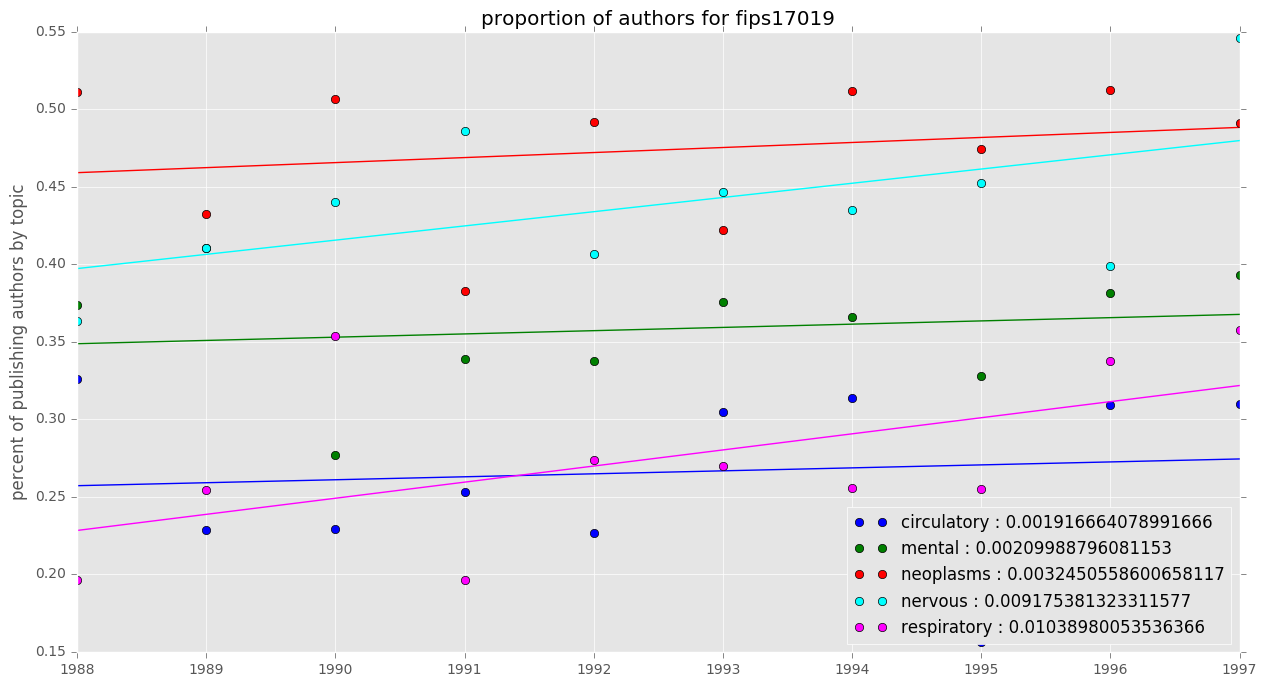

In [209]:
def plot_year_au(fips, start_yr, end_yr):
   
    f, ax1 = plt.subplots(1, figsize=(15,8))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    ax1.set_color_cycle(colors)
    causes = ['circulatory', 'mental', 'neoplasms', 'nervous', 'respiratory']
#     pcts = ['circulatory_pct', 'mental_pct', 'neoplasms_pct', 'nervous_pct', 'respiratory_pct']
    for cause_pct in causes:
        idx = causes.index(cause_pct)
        df = count_authors_mesh_groups.loc[(count_authors_mesh_groups.fips == fips) 
                                           & (count_authors_mesh_groups.year >= start_yr)
                                           & (count_authors_mesh_groups.year <= end_yr)
                                           & (count_authors_mesh_groups.author_count > 10), 
                                           ['fips', 'year', 'author_count', cause_pct, cause_pct+'_pct']].fillna(0)
        #df = df.drop_duplicates()
        #df['log_authors'] = np.log10(df['author_count']+1)
        df['log_pct'] = np.log10(df[cause_pct]+1)/np.log10(df['author_count']+1)
        display(df)

        regr = linear_model.LinearRegression()
        regr.fit(df.year.to_frame(), df['log_pct'].to_frame())
        print(regr.coef_)
        ax1.plot(df.year.to_frame(), regr.predict(df.year.to_frame()), linewidth=1, color=colors[idx])
        ax1.get_xaxis().get_major_formatter().set_useOffset(False)
        points, = ax1.plot(df.year.astype(np.int), df['log_pct'], 'o', label=cause_pct+' : {}'.format(regr.coef_[0][0]))

    ax1.set_title('proportion of authors for fips'+fips)
    ax1.set_ylabel('percent of publishing authors by topic')
    ax1.legend(loc='best')
    plt.show()
    

plot_year_au('17019', 1988, 1997)

/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning:

The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.



fips  year  author_count  circulatory_pct   log_pct
164  1073  1988          1203         0.088944  0.012012
165  1073  1989          1208         0.088576  0.011958
166  1073  1990          1407         0.101635  0.013351
167  1073  1991          1388         0.082133  0.010908
168  1073  1992          1601         0.074329  0.009716
169  1073  1993          1473         0.065852  0.008741
170  1073  1994          1633         0.099816  0.012859
171  1073  1995          1690         0.065089  0.008483
172  1073  1996          1576         0.072970  0.009565
173  1073  1997          1605         0.074143  0.009690

[[-0.00230673]]


fips  year  author_count  mental_pct   log_pct
164  1073  1988          1203    0.018288  0.002555
165  1073  1989          1208    0.015728  0.002199
166  1073  1990          1407    0.009240  0.001269
167  1073  1991          1388    0.022334  0.003052
168  1073  1992          1601    0.024984  0.003344
169  1073  1993          1473    0.014936  0.002032
170  1073  1994          1633    0.032456  0.004317
171  1073  1995          1690    0.025444  0.003380
172  1073  1996          1576    0.035533  0.004742
173  1073  1997          1605    0.026791  0.003582

[[ 0.00191819]]


fips  year  author_count  neoplasms_pct   log_pct
164  1073  1988          1203       0.099751  0.013404
165  1073  1989          1208       0.115894  0.015450
166  1073  1990          1407       0.101635  0.013351
167  1073  1991          1388       0.096542  0.012736
168  1073  1992          1601       0.104934  0.013523
169  1073  1993          1473       0.076714  0.010131
170  1073  1994          1633       0.071035  0.009275
171  1073  1995          1690       0.104142  0.013328
172  1073  1996          1576       0.109772  0.014145
173  1073  1997          1605       0.105296  0.013563

[[-0.00051608]]


fips  year  author_count  nervous_pct   log_pct
164  1073  1988          1203     0.077307  0.010498
165  1073  1989          1208     0.083609  0.011313
166  1073  1990          1407     0.056859  0.007628
167  1073  1991          1388     0.080692  0.010724
168  1073  1992          1601     0.061836  0.008131
169  1073  1993          1473     0.067210  0.008916
170  1073  1994          1633     0.095530  0.012331
171  1073  1995          1690     0.076923  0.009970
172  1073  1996          1576     0.081853  0.010685
173  1073  1997          1605     0.103427  0.013333

[[ 0.00226058]]


fips  year  author_count  respiratory_pct   log_pct
164  1073  1988          1203         0.049044  0.006750
165  1073  1989          1208         0.060430  0.008267
166  1073  1990          1407         0.051173  0.006884
167  1073  1991          1388         0.038905  0.005274
168  1073  1992          1601         0.050593  0.006689
169  1073  1993          1473         0.040054  0.005383
170  1073  1994          1633         0.037355  0.004957
171  1073  1995          1690         0.027219  0.003613
172  1073  1996          1576         0.027284  0.003656
173  1073  1997          1605         0.031776  0.004238

[[-0.00316605]]


TypeError: Can't convert 'int' object to str implicitly

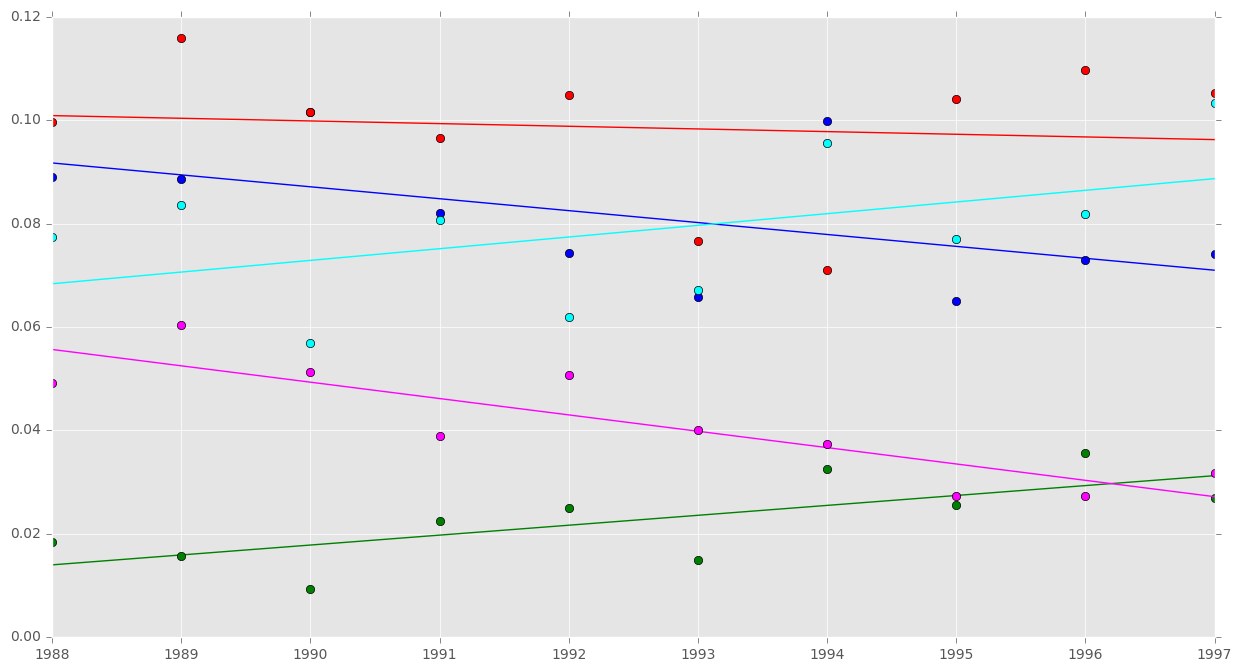

In [11]:
def plot_year_au(fips, start_yr, end_yr):
   
    f, ax1 = plt.subplots(1, figsize=(15,8))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    ax1.set_color_cycle(colors)
#     causes = ['circulatory', 'mental', 'neoplasms', 'nervous', 'respiratory']
    pcts = ['circulatory_pct', 'mental_pct', 'neoplasms_pct', 'nervous_pct', 'respiratory_pct']
    for cause_pct in pcts:
        idx = pcts.index(cause_pct)
        df = count_authors_mesh_groups.loc[(count_authors_mesh_groups.fips == fips) 
                                           & (count_authors_mesh_groups.year >= start_yr)
                                           & (count_authors_mesh_groups.year <= end_yr)
                                           & (count_authors_mesh_groups.author_count > 10), 
                                           ['fips', 'year', 'author_count', cause_pct]].fillna(0)
        #df = df.drop_duplicates()
        #df['log_authors'] = np.log10(df['author_count']+1)
        df['log_pct'] = np.log10(df[cause_pct]+1)/np.log10(df['author_count']+1)
        display(df)

        regr = linear_model.LinearRegression()
        regr.fit(df.year.to_frame(), df[cause_pct].to_frame())
        print(regr.coef_)
        ax1.plot(df.year.to_frame(), regr.predict(df.year.to_frame()), linewidth=1, color=colors[idx])
        ax1.get_xaxis().get_major_formatter().set_useOffset(False)
        points, = ax1.plot(df.year.astype(np.int), df[cause_pct], 'o', label=cause_pct+' : {}'.format(regr.coef_[0][0]))

    ax1.set_title('proportion of authors for fips'+fips)
    ax1.set_ylabel('percent of publishing authors by topic')
    ax1.legend(loc='best')
    plt.show()
    

plot_year_au(1073, 1988, 1997)

In [6]:
def label_time(row):
    if (row['year'] >= 1988) & (row['year'] <= 1997):
        return 1
    if (row['year'] >= 1998) & (row['year'] <= 2007):
        return 2
    if (row['year'] >= 2008) & (row['year'] <= 2016):
        return 3

In [7]:
count_authors_mesh_groups['time_span'] = count_authors_mesh_groups.apply(lambda row: label_time(row), axis=1)

In [8]:
count_authors_mesh_groups.head()

fips  year  author_count                        mesh_groups  \
0  1001  1992             2  Counter({nan: 1, 'neoplasms': 1})   
1  1001  2016             1                  Counter({nan: 1})   
2  1003  1989             1                  Counter({nan: 1})   
3  1003  1990             1                  Counter({nan: 1})   
4  1003  1993             1                  Counter({nan: 1})   

           type_groups  neoplasms  neoplasms_pct  circulatory  \
0  Counter({'HOS': 2})        1.0            0.5          NaN   
1  Counter({'UNK': 1})        NaN            NaN          NaN   
2  Counter({'HOS': 1})        NaN            NaN          NaN   
3  Counter({'UNK': 1})        NaN            NaN          NaN   
4  Counter({'COM': 1})        NaN            NaN          NaN   

   circulatory_pct  nervous  nervous_pct  mental  mental_pct  respiratory  \
0              NaN      NaN          NaN     NaN         NaN          NaN   
1              NaN      NaN          NaN     NaN         NaN          NaN   
2              NaN      NaN          NaN     NaN         NaN          NaN   
3              NaN      NaN          NaN     NaN         NaN          NaN   
4              NaN      NaN          NaN     NaN         NaN          NaN   

   respiratory_pct  nan no_mesh  time_span  
0              NaN  1.0     NaN        1.0  
1              NaN  1.0    True        3.0  
2              NaN  1.0    True        1.0  
3              NaN  1.0    True        1.0  
4              NaN  1.0    True        1.0

In [23]:
def get_delta(x):
    regr = linear_model.LinearRegression()
    regr.fit(x['year'].to_frame(),x['circulatory_pct'].to_frame())
    circ = regr.coef_[0][0]
    regr.fit(x['year'].to_frame(),x['neoplasms_pct'].to_frame())
    neo = regr.coef_[0][0]
    regr.fit(x['year'].to_frame(),x['respiratory_pct'].to_frame())
    resp = regr.coef_[0][0]
    regr.fit(x['year'].to_frame(),x['nervous_pct'].to_frame())
    nervous = regr.coef_[0][0]
    regr.fit(x['year'].to_frame(),x['mental_pct'].to_frame())
    mental = regr.coef_[0][0]
    return pd.Series(dict(
        delta_circ = circ,
        delta_neo = neo,
        delta_resp = resp,
        delta_nervous = nervous,
        delta_mental = mental
        ))


count_authors_reduced = count_authors_mesh_groups.loc[(count_authors_mesh_groups.author_count >= 10) & (count_authors_mesh_groups.year < 2017),:]
count_authors = count_authors_reduced.fillna(0).groupby(['time_span','fips']).apply(get_delta)
count_authors = count_authors.reset_index()

In [25]:
print(count_authors.shape)
count_authors.head()

(1933, 7)


time_span  fips  delta_circ  delta_mental  delta_neo  delta_nervous  \
0        1.0  1045    0.000000      0.014311   0.000000      -0.011235   
1        1.0  1047    0.000000      0.000000   0.000000       0.000000   
2        1.0  1073   -0.002307      0.001918  -0.000516       0.002261   
3        1.0  1081   -0.000237      0.001846   0.000842       0.002810   
4        1.0  1087    0.001201      0.000000   0.001412      -0.004272   

   delta_resp  
0   -0.006783  
1    0.000000  
2   -0.003166  
3   -0.000696  
4    0.000000

In [26]:
count_authors_reduced.head()

fips  year  author_count  \
44  1015  2016            21   
82  1045  1991            10   
83  1045  1992            12   
84  1045  1993            11   
86  1045  1995            13   

                                          mesh_groups  \
44                                 Counter({nan: 21})   
82                    Counter({nan: 8, 'nervous': 2})   
83  Counter({nan: 9, 'nervous': 2, 'respiratory': 1})   
84                    Counter({nan: 9, 'nervous': 2})   
86      Counter({nan: 11, 'mental': 2, 'nervous': 2})   

                                          type_groups  neoplasms  \
44  Counter({'EDU': 12, 'UNK': 5, 'GOV': 2, 'HOS':...        NaN   
82            Counter({'MIL': 7, 'COM': 2, 'UNK': 1})        NaN   
83  Counter({'MIL': 9, 'UNK': 1, 'EDU': 1, 'HOS': 1})        NaN   
84                     Counter({'MIL': 10, 'HOS': 1})        NaN   
86                               Counter({'MIL': 13})        NaN   

    neoplasms_pct  circulatory  circulatory_pct  nervous  nervous_pct  mental  \
44            NaN          NaN              NaN      NaN          NaN     NaN   
82            NaN          NaN              NaN      2.0     0.200000     NaN   
83            NaN          NaN              NaN      2.0     0.166667     NaN   
84            NaN          NaN              NaN      2.0     0.181818     NaN   
86            NaN          NaN              NaN      2.0     0.153846     2.0   

    mental_pct  respiratory  respiratory_pct   nan no_mesh  time_span  
44         NaN          NaN              NaN  12.0    True        3.0  
82         NaN          NaN              NaN   8.0     NaN        1.0  
83         NaN          1.0         0.083333   9.0     NaN        1.0  
84         NaN          NaN              NaN   9.0     NaN        1.0  
86    0.153846          NaN              NaN  11.0     NaN        1.0

In [29]:
count_authors_delta = pd.merge(count_authors_reduced, count_authors, on=['time_span','fips'], how='left')
count_authors_delta.head()

fips  year  author_count  \
0  1015  2016            21   
1  1045  1991            10   
2  1045  1992            12   
3  1045  1993            11   
4  1045  1995            13   

                                         mesh_groups  \
0                                 Counter({nan: 21})   
1                    Counter({nan: 8, 'nervous': 2})   
2  Counter({nan: 9, 'nervous': 2, 'respiratory': 1})   
3                    Counter({nan: 9, 'nervous': 2})   
4      Counter({nan: 11, 'mental': 2, 'nervous': 2})   

                                         type_groups  neoplasms  \
0  Counter({'EDU': 12, 'UNK': 5, 'GOV': 2, 'HOS':...        NaN   
1            Counter({'MIL': 7, 'COM': 2, 'UNK': 1})        NaN   
2  Counter({'MIL': 9, 'UNK': 1, 'EDU': 1, 'HOS': 1})        NaN   
3                     Counter({'MIL': 10, 'HOS': 1})        NaN   
4                               Counter({'MIL': 13})        NaN   

   neoplasms_pct  circulatory  circulatory_pct  nervous     ...      \
0            NaN          NaN              NaN      NaN     ...       
1            NaN          NaN              NaN      2.0     ...       
2            NaN          NaN              NaN      2.0     ...       
3            NaN          NaN              NaN      2.0     ...       
4            NaN          NaN              NaN      2.0     ...       

   respiratory  respiratory_pct   nan  no_mesh  time_span  delta_circ  \
0          NaN              NaN  12.0     True        3.0         0.0   
1          NaN              NaN   8.0      NaN        1.0         0.0   
2          1.0         0.083333   9.0      NaN        1.0         0.0   
3          NaN              NaN   9.0      NaN        1.0         0.0   
4          NaN              NaN  11.0      NaN        1.0         0.0   

  delta_mental  delta_neo  delta_nervous  delta_resp  
0     0.000000        0.0       0.000000    0.000000  
1     0.014311        0.0      -0.011235   -0.006783  
2     0.014311        0.0      -0.011235   -0.006783  
3     0.014311        0.0      -0.011235   -0.006783  
4     0.014311        0.0      -0.011235   -0.006783  

[5 rows x 23 columns]

In [31]:
count_authors_delta.to_csv('./data/count_authors_delta.tsv', sep='\t', index=False)

In [254]:
from ipywidgets import interact, widgets

# interact(plot_map,
#          column=['neoplasms', 'circulatory', 'nervous', 'respiratory', 'mental'],
#          year=(1988,2015))

In [253]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='nataliedeclerck', api_key='flExXXMvn7ZEvym6QEMl')


In [255]:
origin = widgets.Dropdown(
    options=['neoplasms', 'circulatory', 'nervous', 'respiratory', 'mental'],
    value='neoplasms',
    description='mesh group:',
)

month = widgets.FloatSlider(
    value=2014,
    min=1999,
    max=2014,
    step=1,
    description='year:',
    continuous_update = False
)

container = widgets.HBox(children=[origin, month])

Boston


/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[[ 0.03306266]]


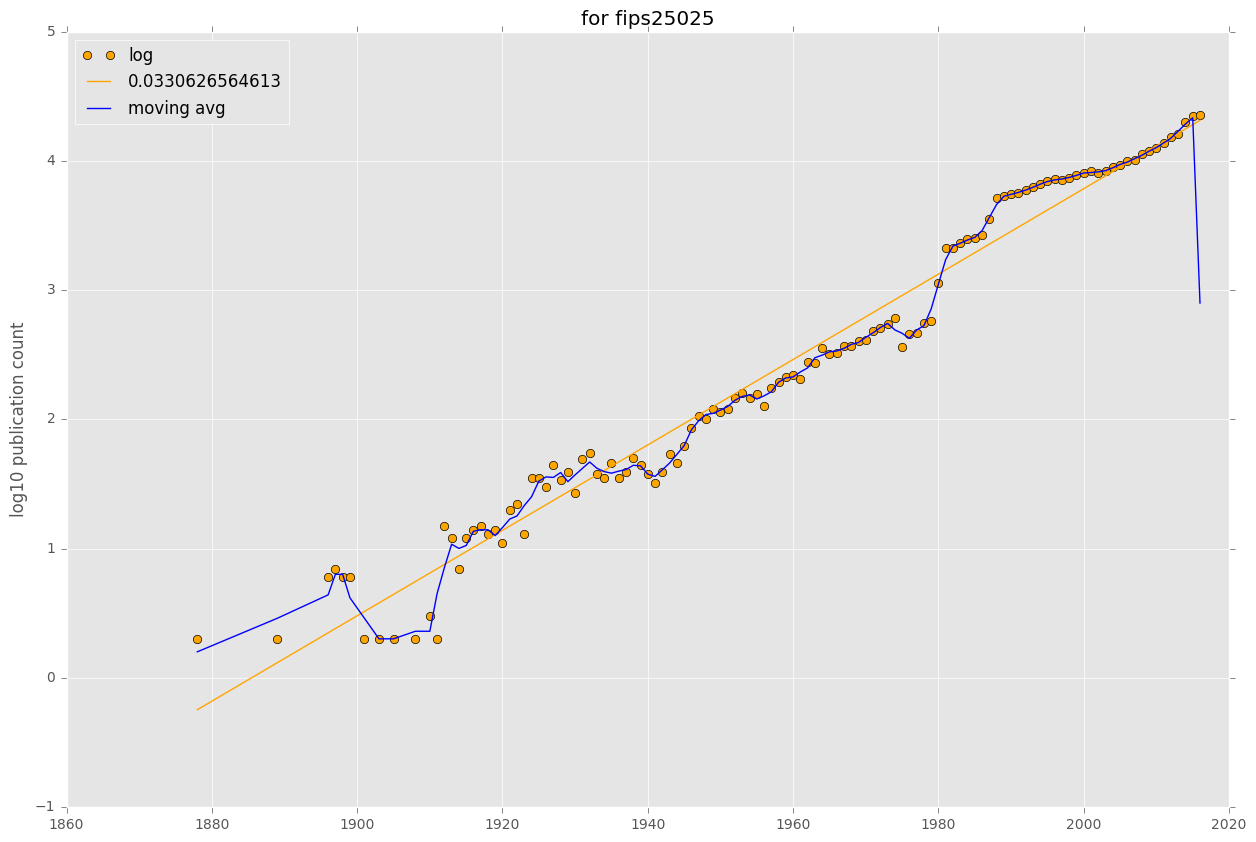

NYC
[[ 0.02880644]]


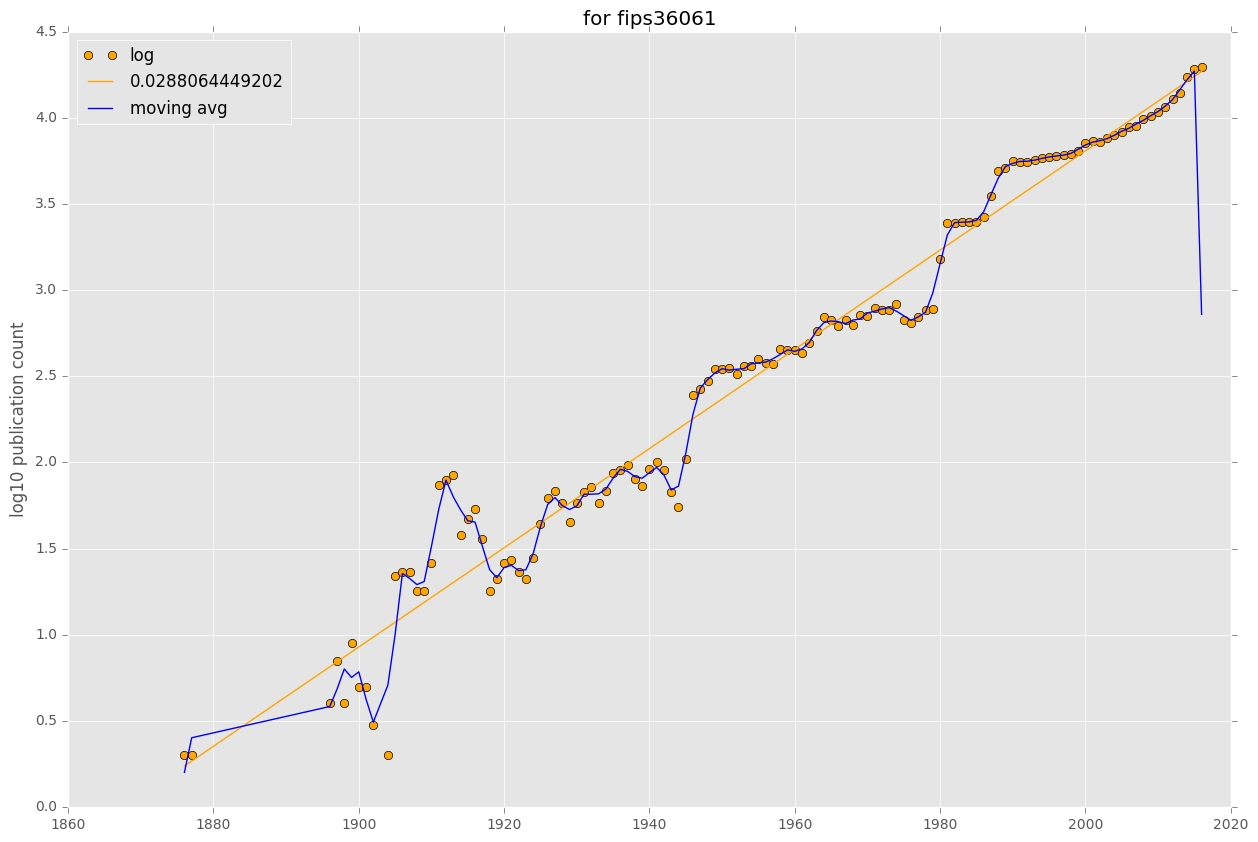

LA
[[ 0.03380055]]


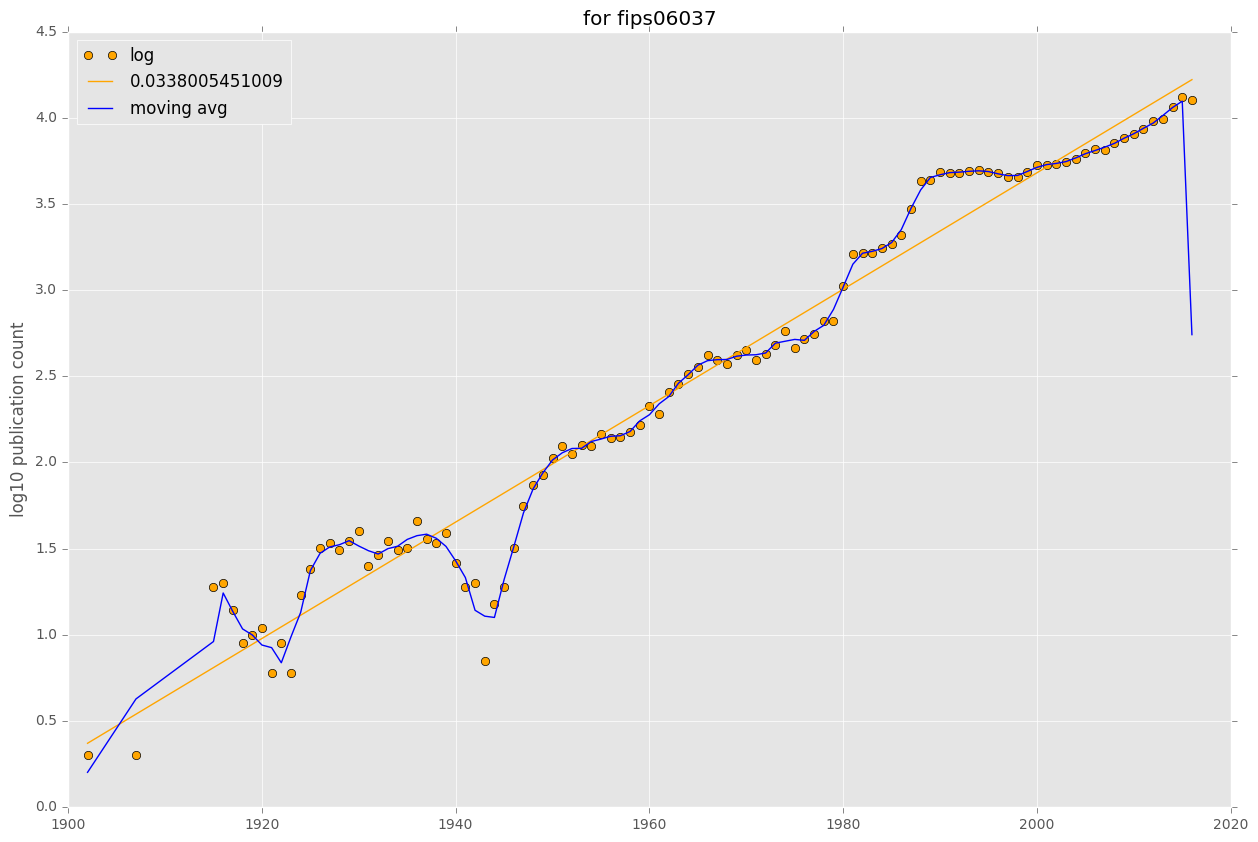

Chicago
[[ 0.03275369]]


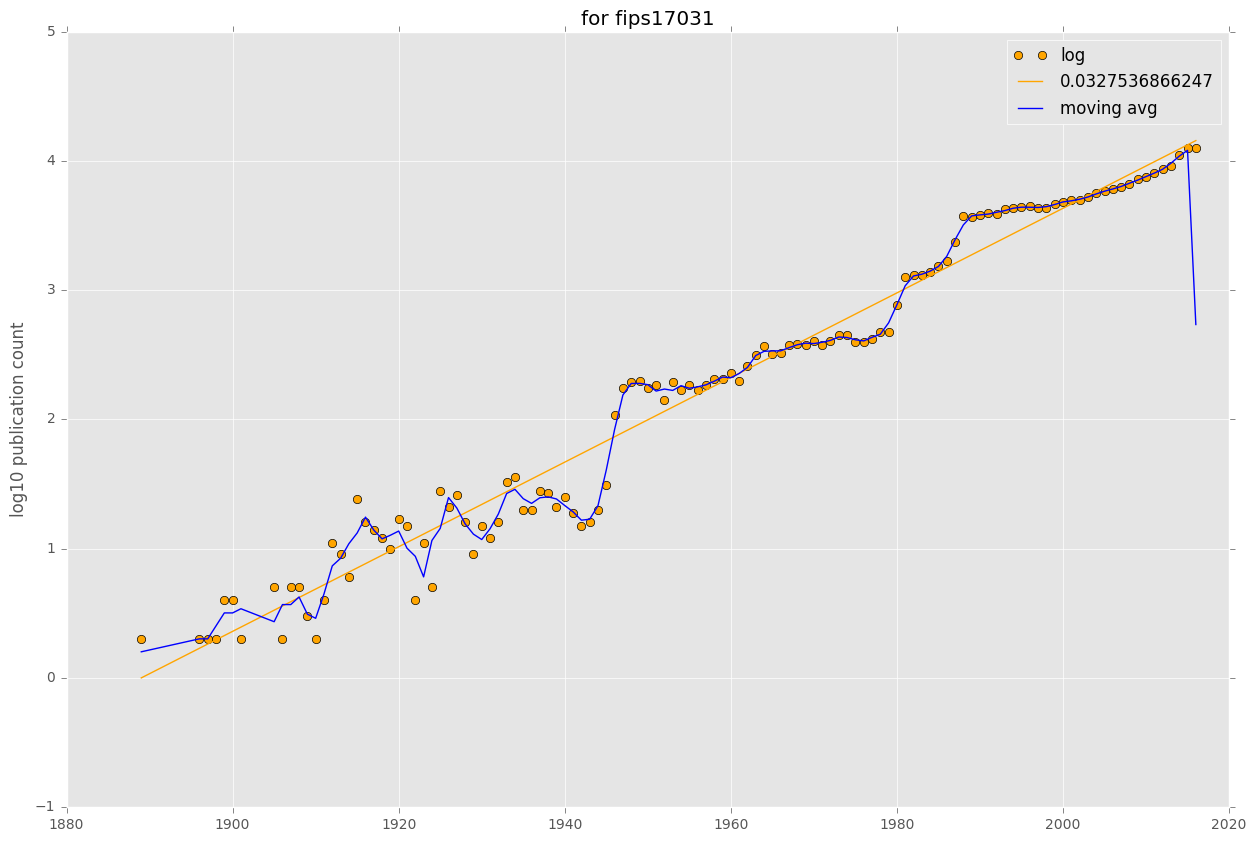

Baltimore
[[ 0.02970692]]


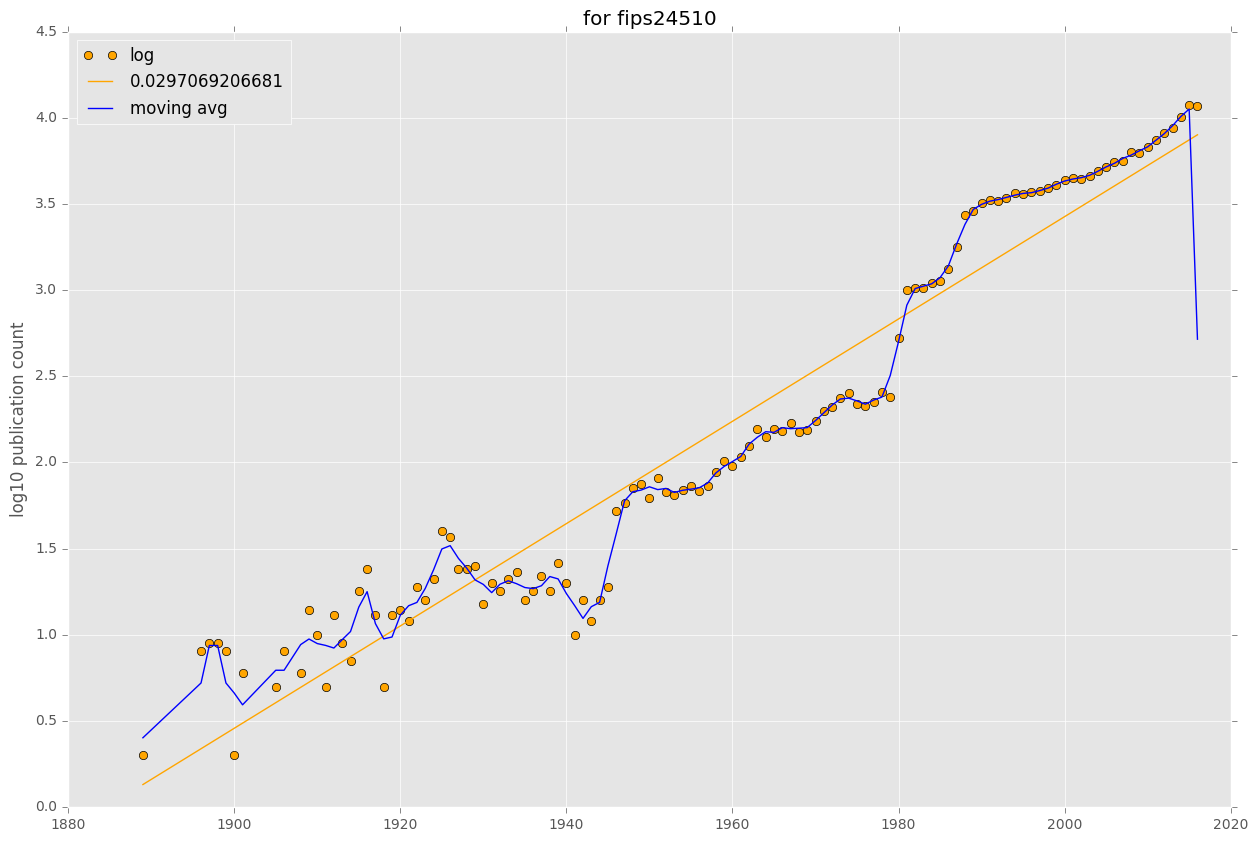

Philadelphia
[[ 0.03303668]]


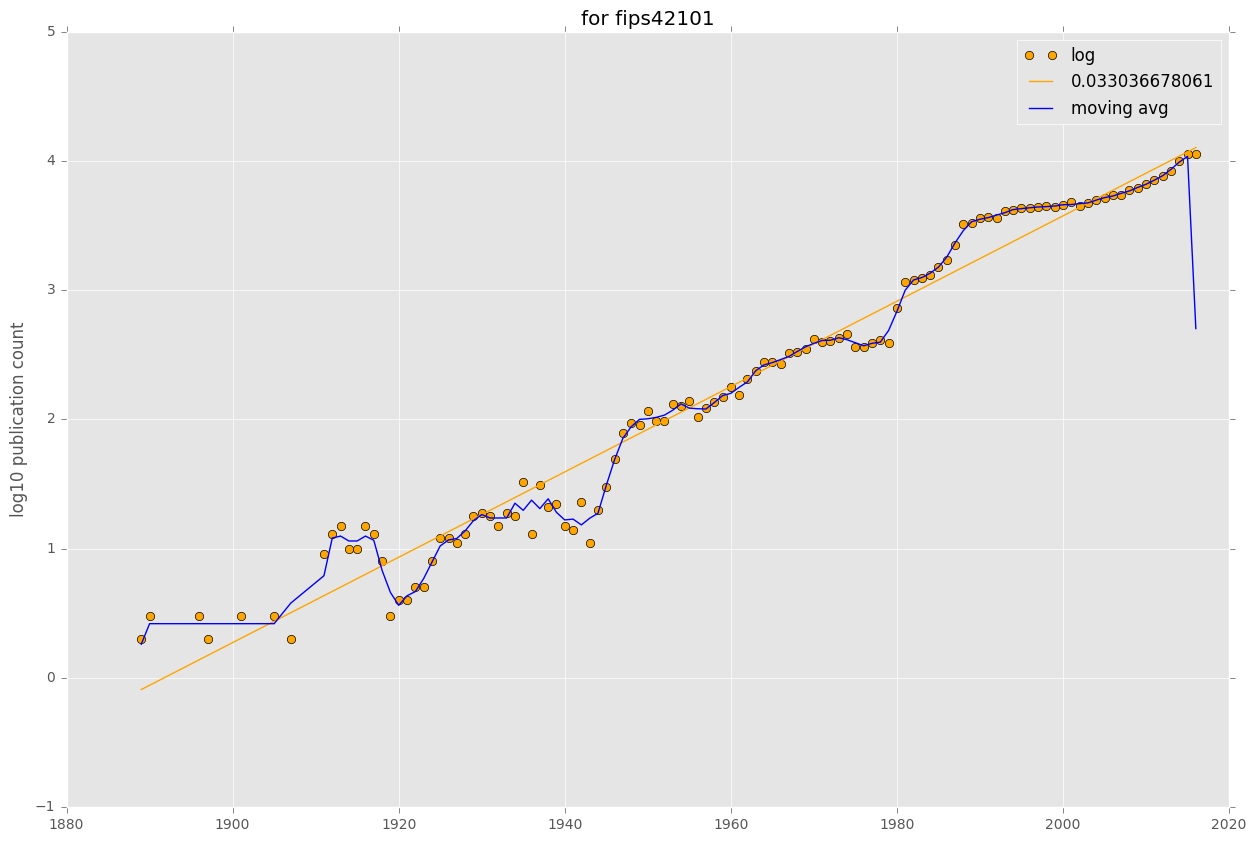

Houston
[[ 0.04608129]]


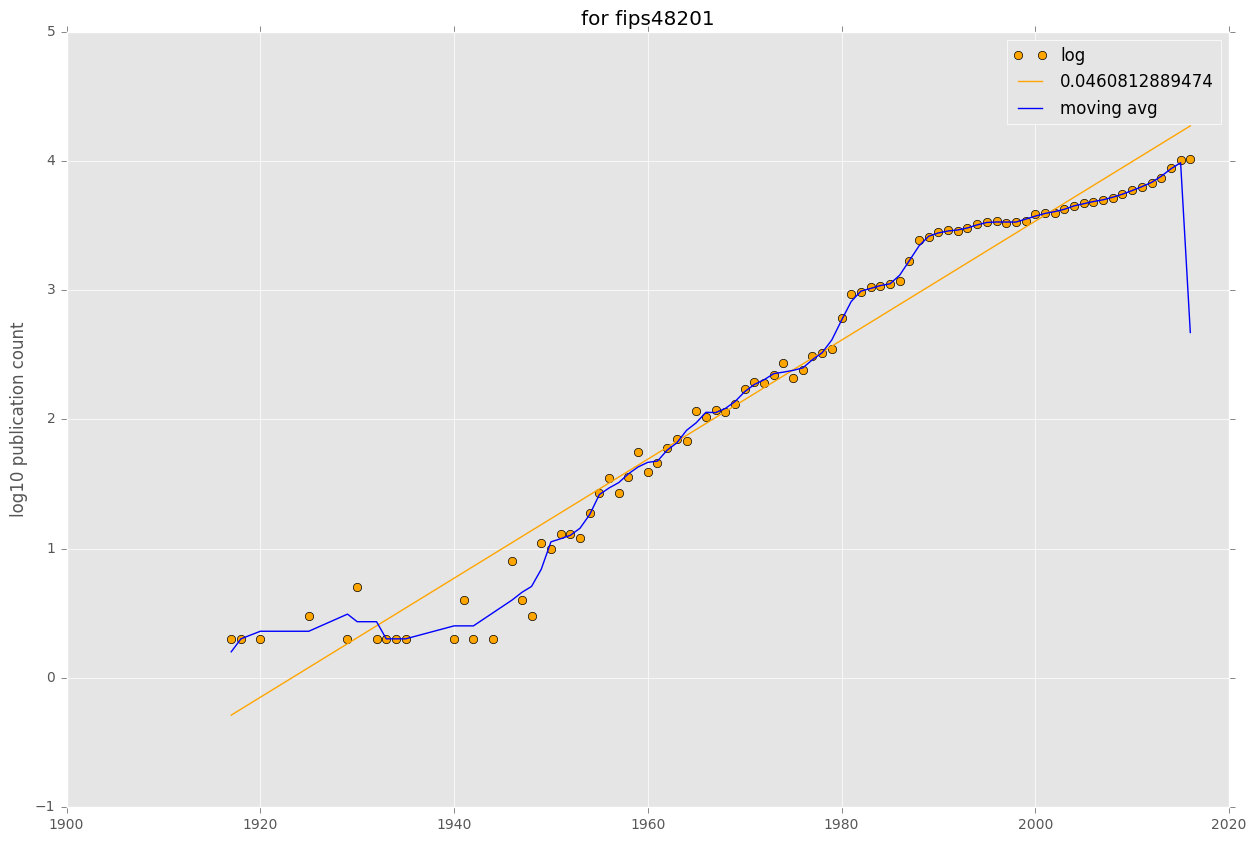

CU
[[ 0.03272103]]


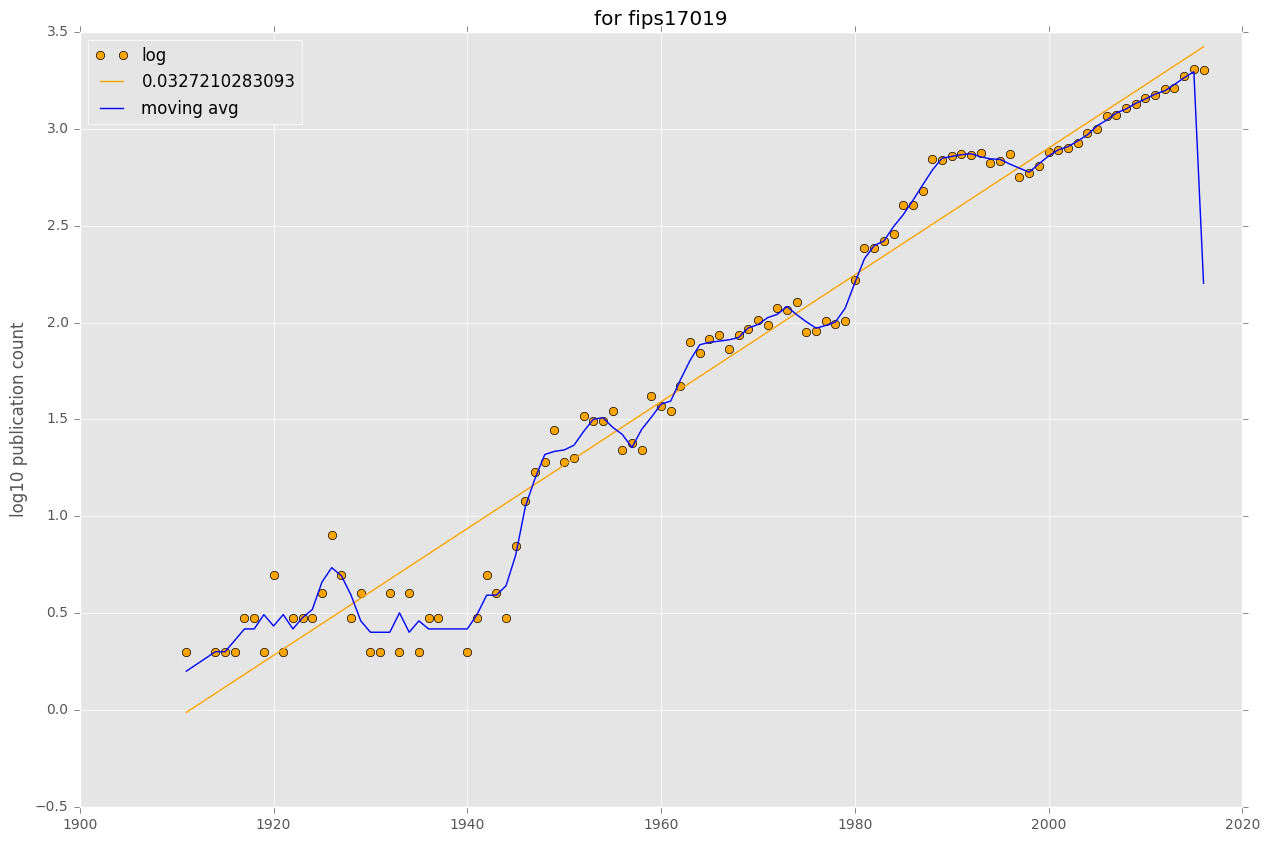

In [124]:
from sklearn import linear_model
### change this to plot year x pubs for a fips using mort_pubs
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def plot_year_pubs(fips):
    #f, axs = plt.subplots(2,1, sharex=True, figsize=(15,10))
    f, axs = plt.subplots(1,1, figsize=(15,10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    
    axs.set_color_cycle(colors)
    #axs[1].set_color_cycle(colors)

    df = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips == fips) & (count_PMID_mesh_groups.year < 2017),:]
    df['log'] = np.log10(df['PMID_count'] + 1)
    
    causes = ['circulatory', 'mental', 'neoplasms', 'nervous', 'respiratory']
    
#     for cause in causes:
#         idx = causes.index(cause)
#         df2 = mort.loc[(mort.fips == fips) & (mort.cause == cause), ['year', 'rate']]
        
#         regr = linear_model.LinearRegression()
#         regr.fit(df2.year.to_frame(), df2.rate.to_frame())
#         #print(regr.coef_)
#         axs[1].plot(df2.year.to_frame(), regr.predict(df2.year.to_frame()), linewidth=1)

#         points, = axs[1].plot(df2['year'], df2['rate'], 'o', label=cause+' : {}'.format(regr.coef_[0][0]), color=colors[idx])


    regr = linear_model.LinearRegression()
    regr.fit(df.year.to_frame(), df.log.to_frame())
    print(regr.coef_)
    
    axs.plot(df['year'], df['log'], 'o', color='orange')
    axs.plot(df.year.to_frame(), regr.predict(df.year.to_frame()), linewidth=1, color='orange', label=regr.coef_[0][0])
    
    
    win = 3
    y_av = movingaverage(df.log, win)
    axs.plot(df['year'], y_av, label='moving avg', color='blue')

    axs.set_title('for fips'+fips)
    axs.set_ylabel('log10 publication count')
    axs.legend(loc='best')
    
#     axs[1].set_ylabel('mortality rate by cause')
#     axs[1].legend(loc='best')
    plt.show()

    


print('Boston')
plot_year_pubs('25025') #Boston
#plot_year_pubs('25017') #Boston
# plot_year_pubs('25021') #Boston
# plot_year_pubs('48037') #Boston
# plot_year_pubs('51083') #Boston

print('NYC')
plot_year_pubs('36061')

print('LA')
plot_year_pubs('06037')
#plot_year_pubs('06087') #LA

print('Chicago')
plot_year_pubs('17031') #Chicago

print('Baltimore')
plot_year_pubs('24510') 

print('Philadelphia')
plot_year_pubs('42101') 

print('Houston')
plot_year_pubs('48201') 

print('CU')
plot_year_pubs('17019') #CU


#no change   
#plot_year_pubs('51177')

# outliers where delta_pubs > 0.08
# plot_year_pubs('21085') # Leitchfield, KY
# plot_year_pubs('26141') # Millersburg, MI
# plot_year_pubs('01071') # Princeton, AL


delta rate less than -10
Boston


/Users/nataliedeclerck/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning:

The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.



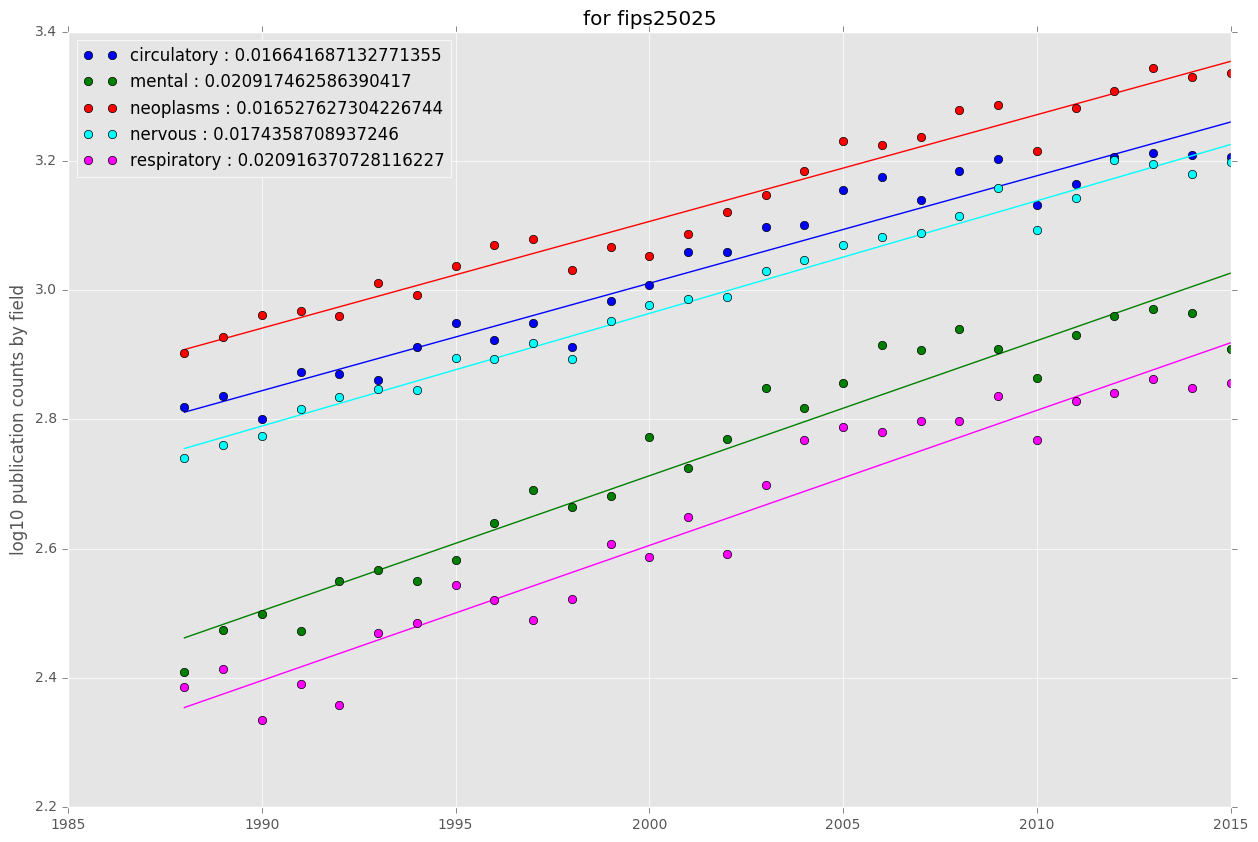

NYC, Manhattan


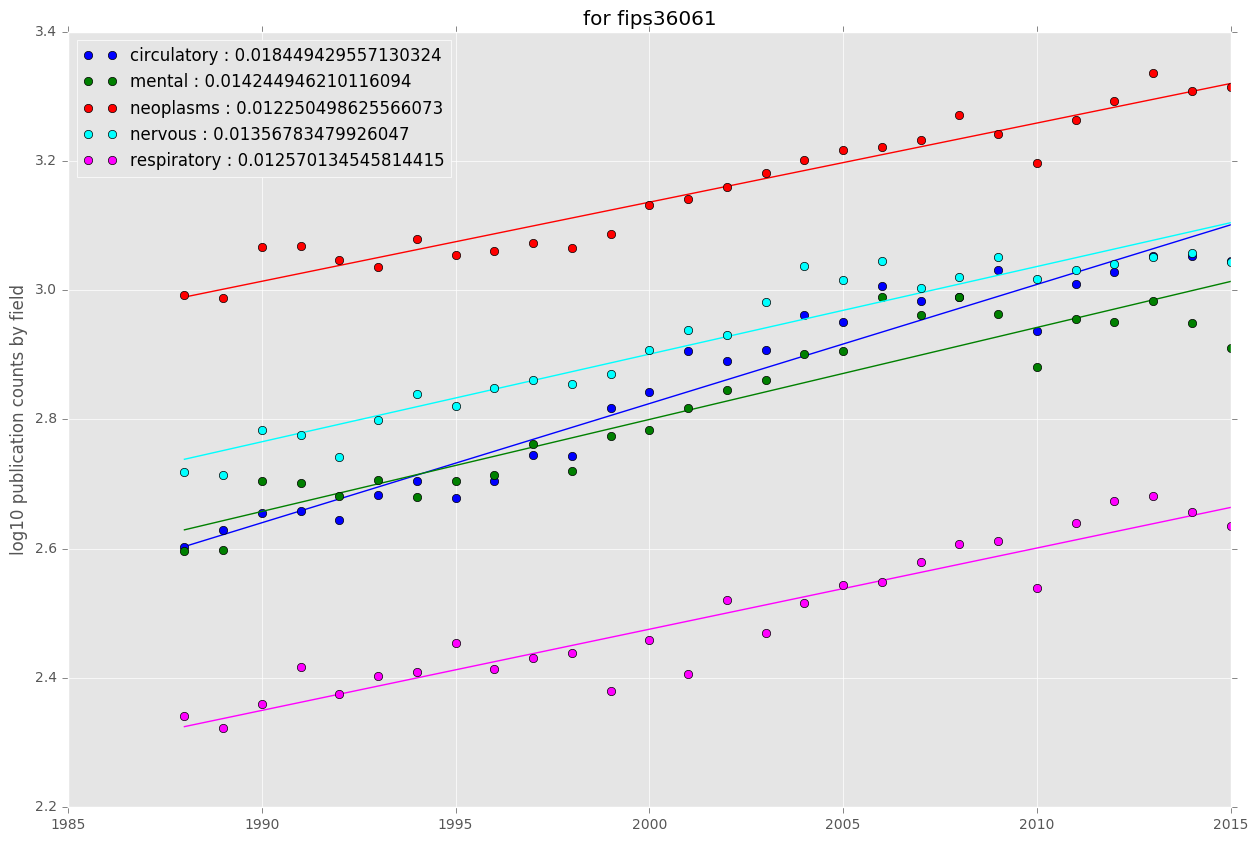

Chicago


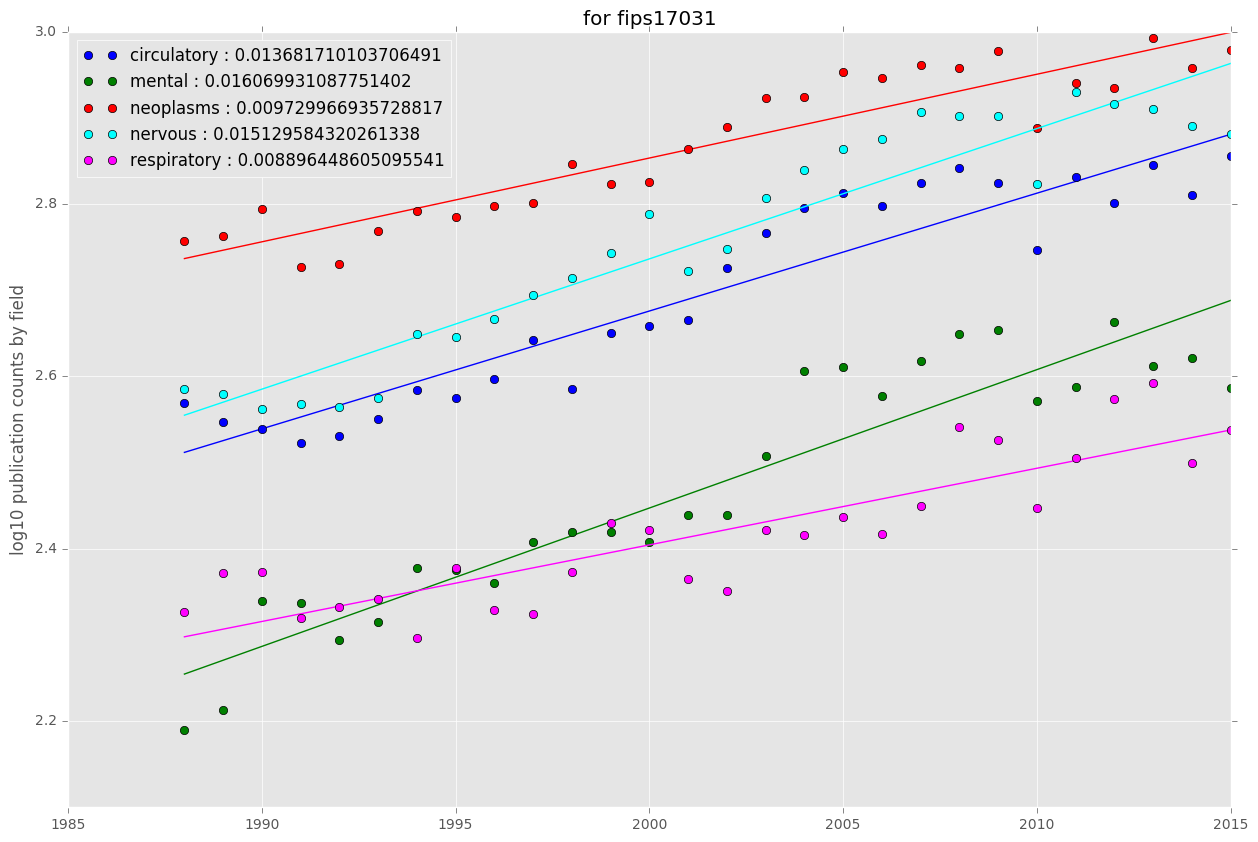

Baltimore


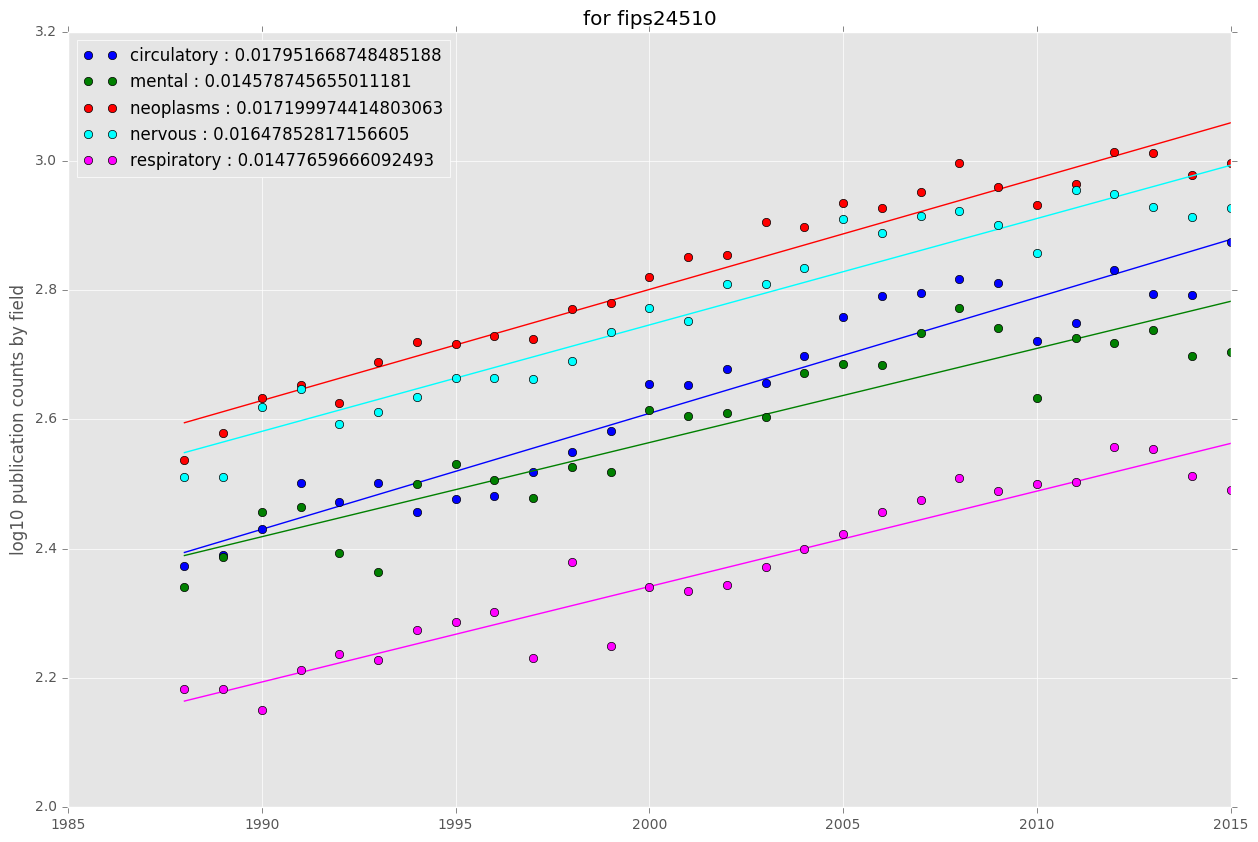

Houston


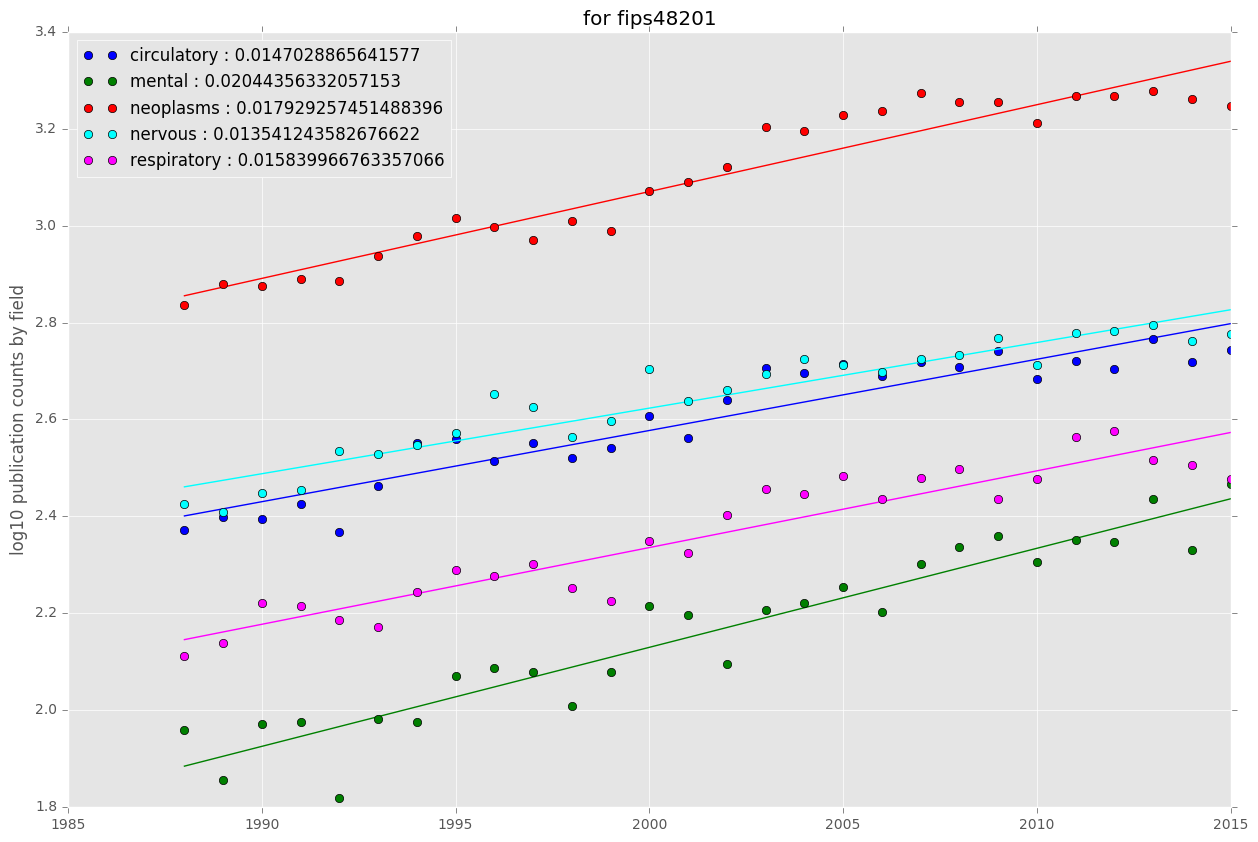

delta rate between -10 and -5
Monroe, LA; delta rate -6.22


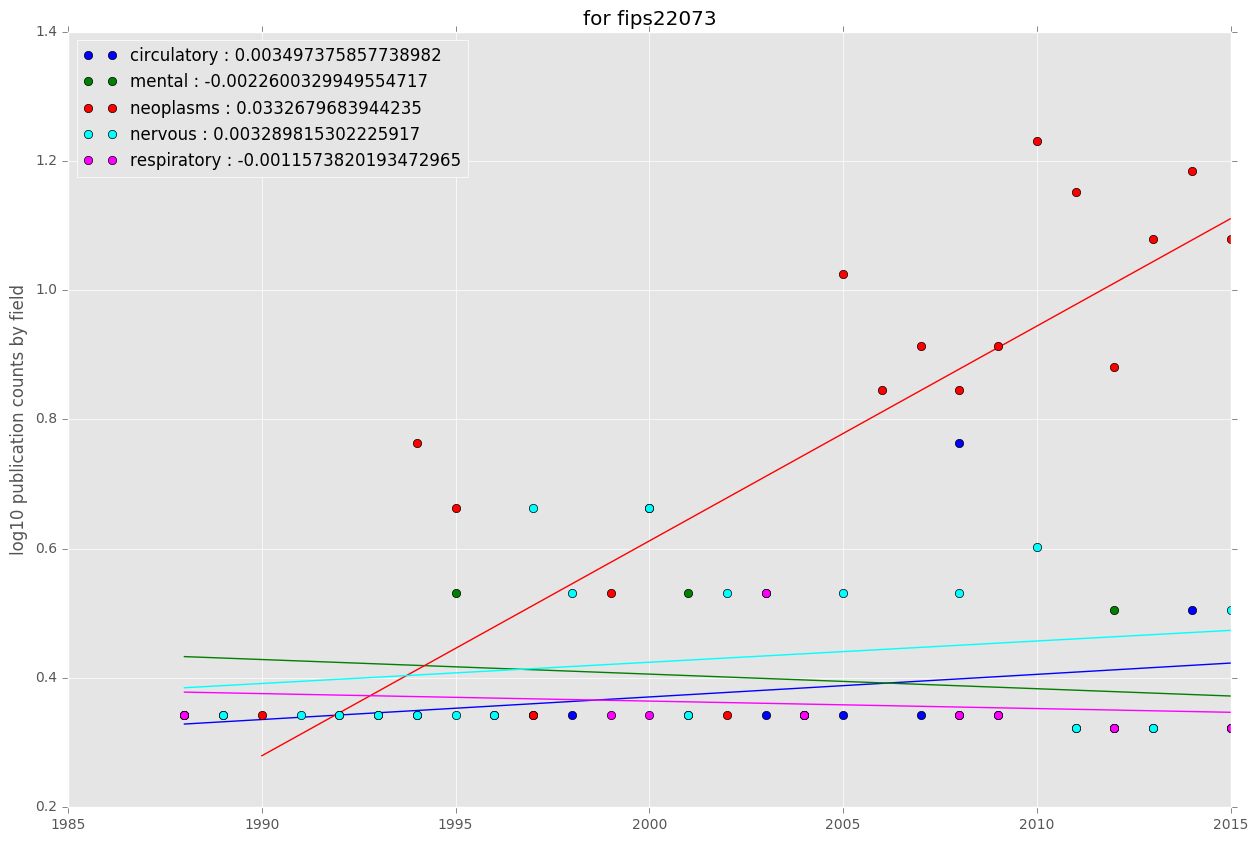

Fayetteville, AK; delta rate -9.8


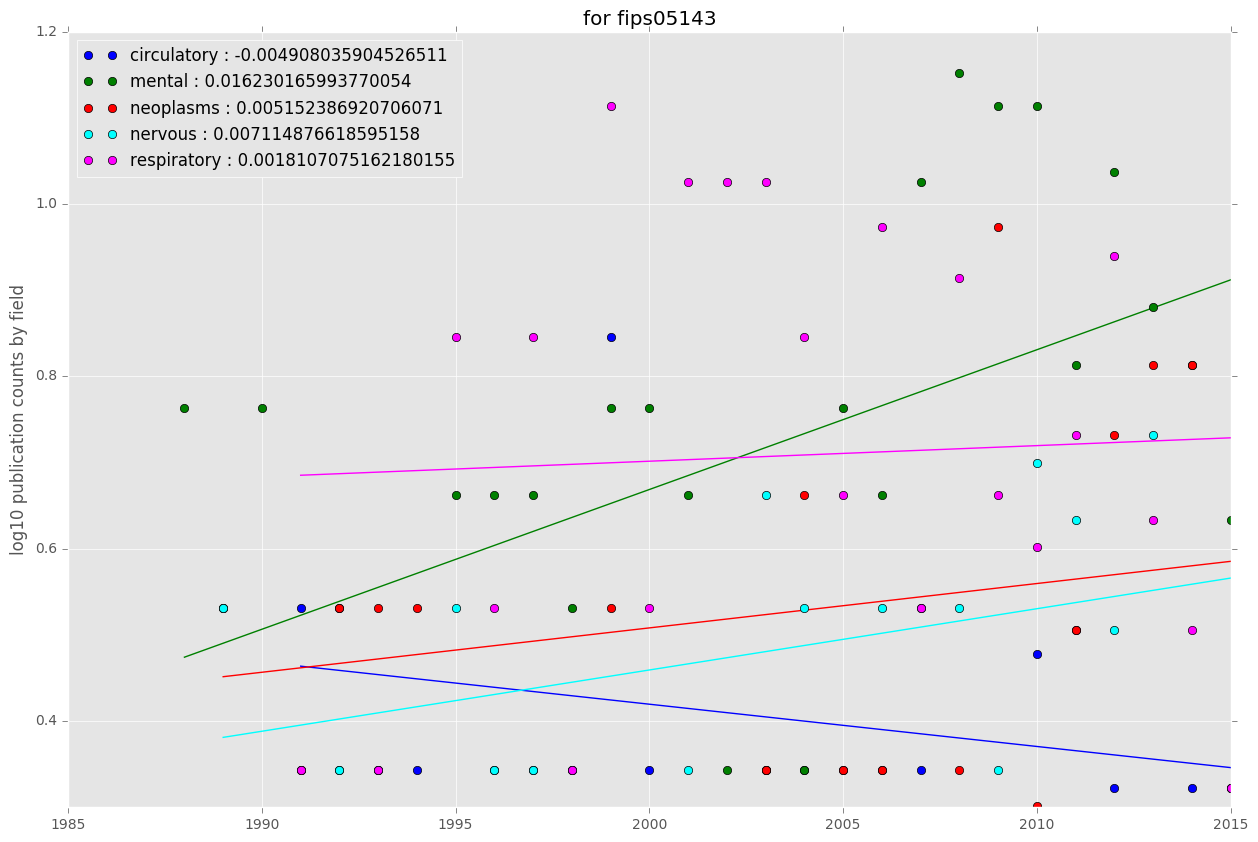

Macon, GA; delta rate -6.4


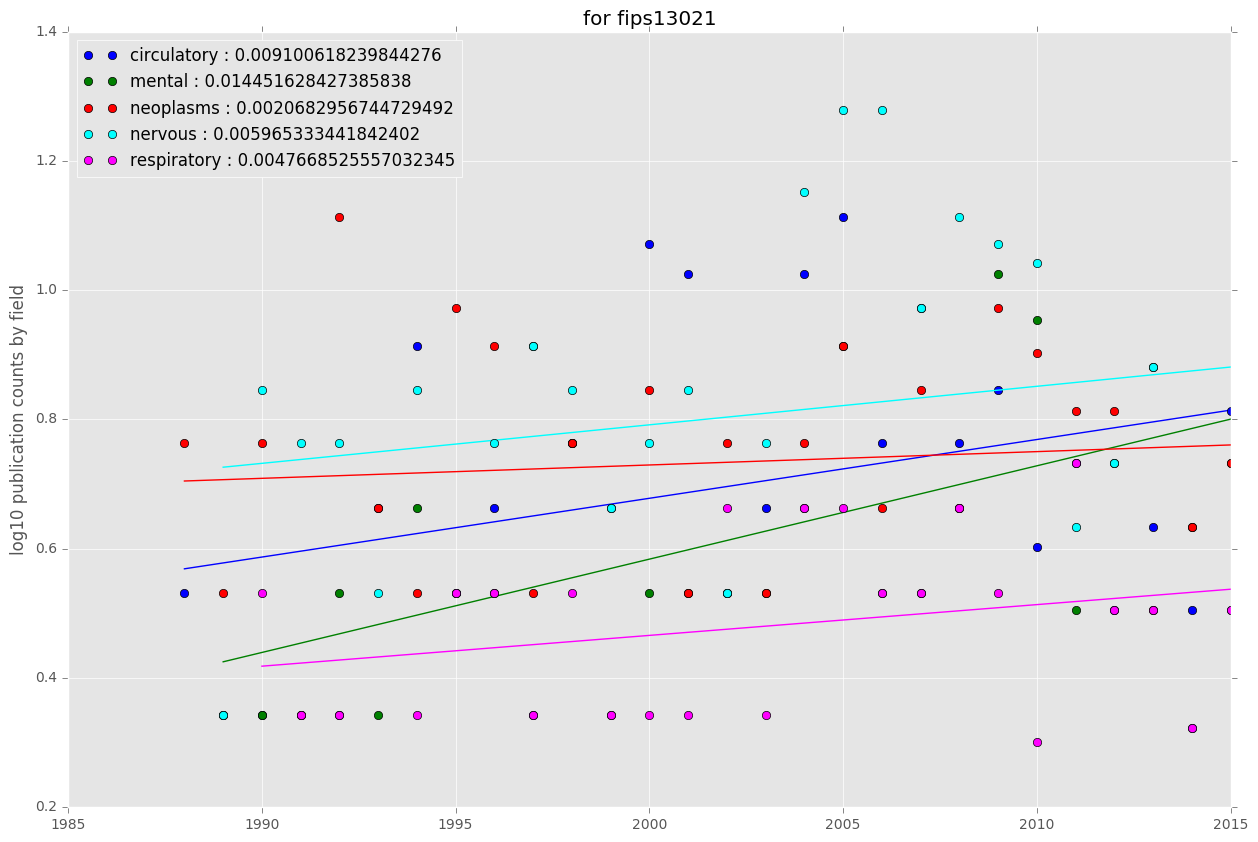

Midland, MI; delta rate -9.4


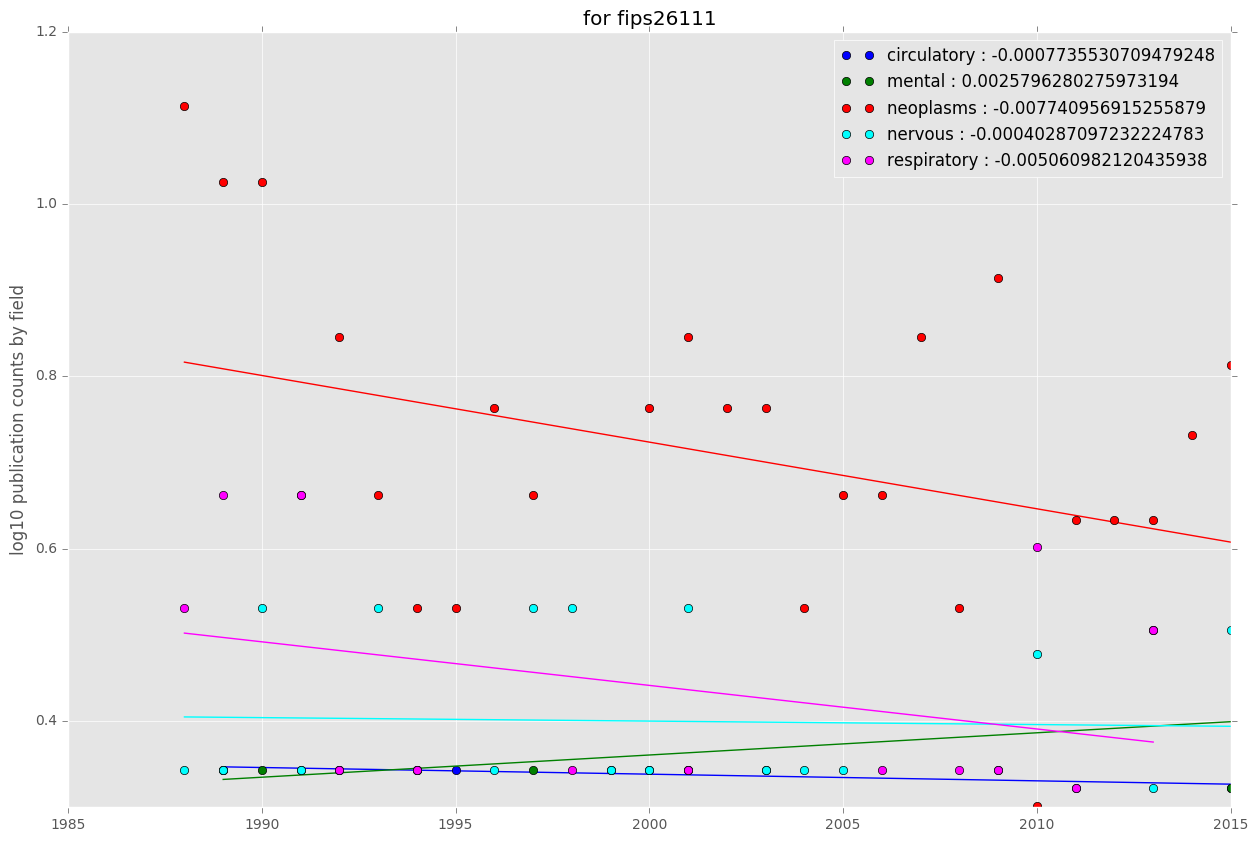

delta rate greater than -5
Huntington, WV; -4.09


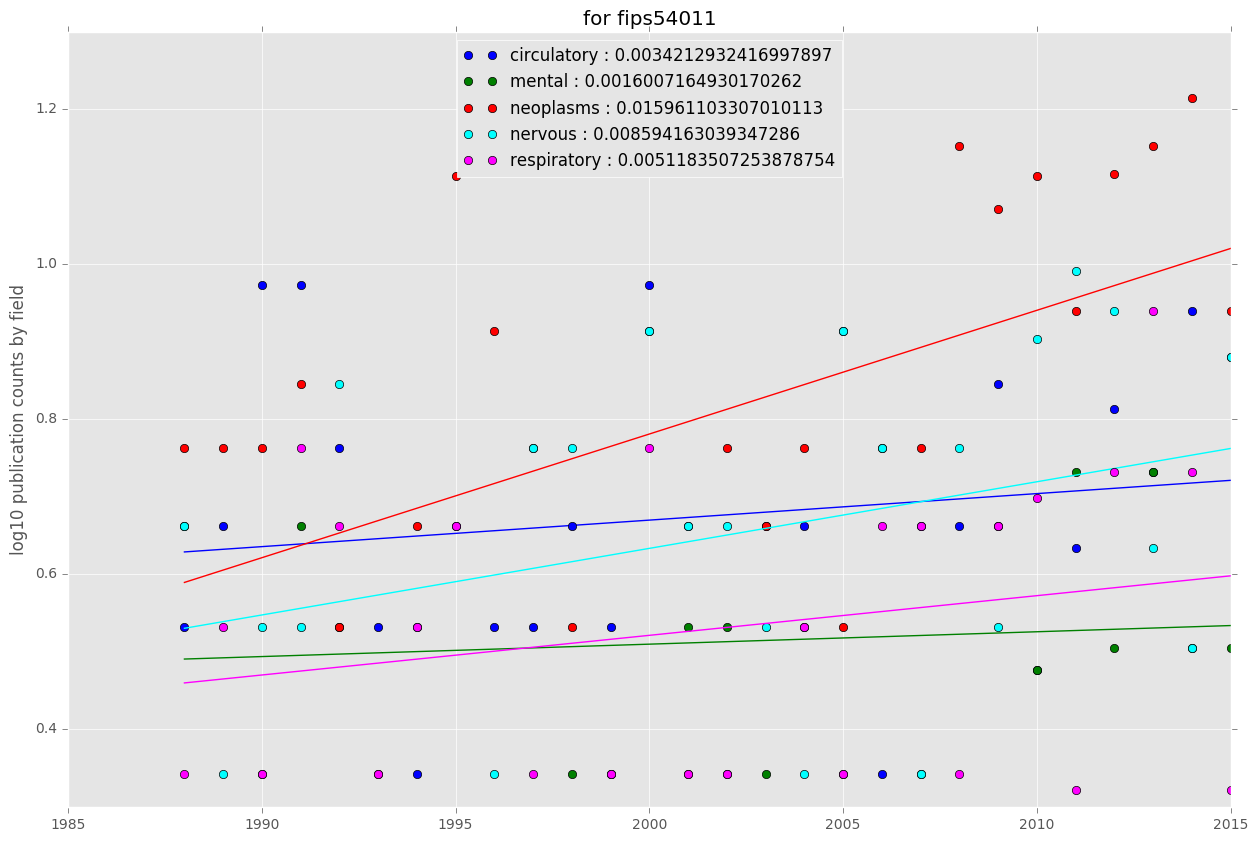

Birmingham, AL; 3.39


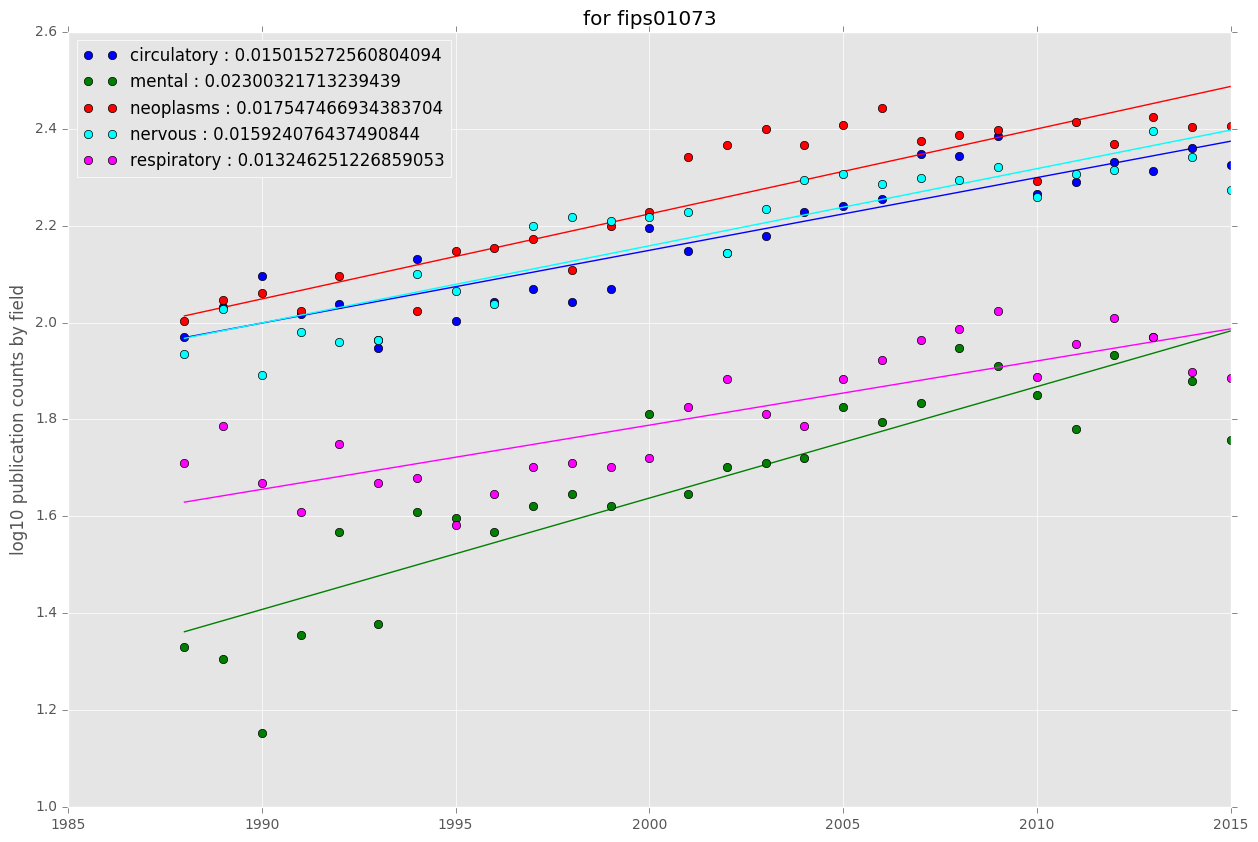

Oshkosh, WI; 3.0


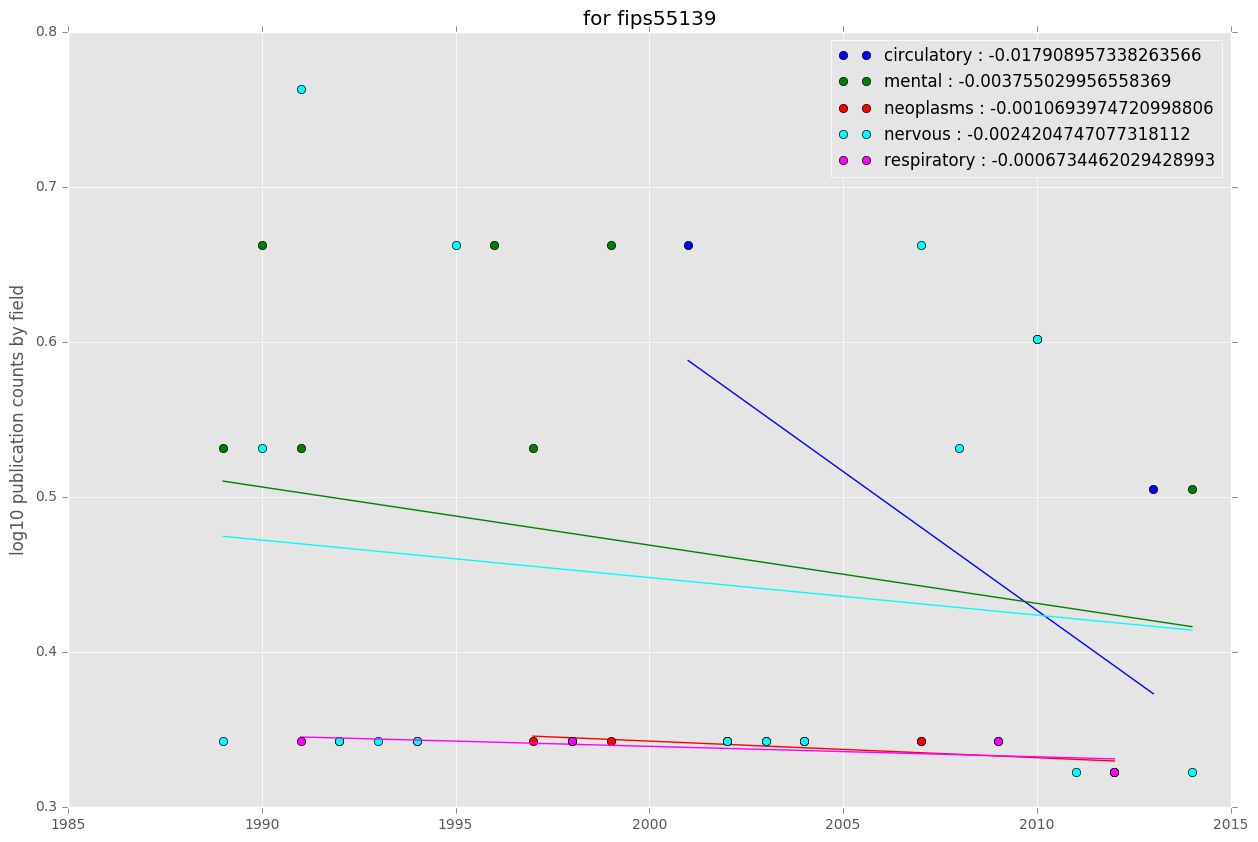

In [207]:

### change this to plot year x pubs for a fips using mort_pubs
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def plot_year_pubs(fips):
    #f, axs = plt.subplots(2,1, sharex=True, figsize=(15,10))
    f, axs = plt.subplots(1,1, figsize=(15,10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    
    axs.set_color_cycle(colors)
    #axs[1].set_color_cycle(colors)

    df = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips == fips) & (count_PMID_mesh_groups.year < 2015) & (count_PMID_mesh_groups.year > 1987),:]
    #df['log'] = np.log10(df['PMID_count'] + 1)
    
    causes = ['circulatory', 'mental', 'neoplasms', 'nervous', 'respiratory']
    
    for cause in causes:
        idx = causes.index(cause)
        df2 = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips == fips) 
                                         & (count_PMID_mesh_groups.year < 2016) 
                                         & (count_PMID_mesh_groups.year > 1987) 
                                         & (pd.isnull(count_PMID_mesh_groups[cause]) == False), ['year', cause]]
        df2.loc[(df2.year < 2010), cause] = df2.loc[(df2.year < 2010), cause] * 1.2
        df2.loc[(df2.year > 2010), cause] = df2.loc[(df2.year > 2010), cause] * 1.1
        df2['log_'+cause] = np.log10(df2[cause] + 1)
        
        regr = linear_model.LinearRegression()
        regr.fit(df2.year.to_frame(), df2['log_'+cause].to_frame())
        #print(regr.coef_)
        axs.plot(df2.year.to_frame(), regr.predict(df2.year.to_frame()), linewidth=1)

        points, = axs.plot(df2['year'], df2['log_'+cause], 'o', label=cause+' : {}'.format(regr.coef_[0][0]), color=colors[idx])


#     regr = linear_model.LinearRegression()
#     regr.fit(df.year.to_frame(), df.log.to_frame())
#     print(regr.coef_)
    
#     axs.plot(df['year'], df['log'], 'o', color='orange')
#     axs.plot(df.year.to_frame(), regr.predict(df.year.to_frame()), linewidth=1, color='orange', label=regr.coef_[0][0])
    
    
#     win = 3
#     y_av = movingaverage(df.log, win)
#     axs.plot(df['year'], y_av, label='moving avg', color='blue')

    axs.set_title('for fips'+fips)
#     axs.set_ylabel('log10 publication count')
#     axs.legend(loc='best')
    
    axs.set_ylabel('log10 publication counts by field')
    axs.legend(loc='best')
    plt.show()

#no change   
#plot_year_pubs('51177')

#plot_year_pubs('01001')


print("delta rate less than -10")
print('Boston')
plot_year_pubs('25025') #Boston
#plot_year_pubs('25017') #Boston
# plot_year_pubs('25021') #Boston
# plot_year_pubs('48037') #Boston
# plot_year_pubs('51083') #Boston

print('NYC, Manhattan')
plot_year_pubs('36061')

# print('LA')
# plot_year_pubs('06037')
# #plot_year_pubs('06087') #LA

print('Chicago')
plot_year_pubs('17031') #Chicago

print('Baltimore')
plot_year_pubs('24510') 

# print('Philadelphia')
# plot_year_pubs('42101') 

print('Houston')
plot_year_pubs('48201') 

# print('CU')
# plot_year_pubs('17019') #CU

# middle group:
# rate between -10 and -5

print("delta rate between -10 and -5")
print("Monroe, LA; delta rate -6.22")
plot_year_pubs('22073')

print("Fayetteville, AK; delta rate -9.8")
plot_year_pubs('05143')

print("Macon, GA; delta rate -6.4")
plot_year_pubs('13021')

print("Midland, MI; delta rate -9.4")
plot_year_pubs('26111')


print("delta rate greater than -5")

print("Huntington, WV; -4.09")
plot_year_pubs('54011')

print("Birmingham, AL; 3.39")
plot_year_pubs('01073')

print("Oshkosh, WI; 3.0")
plot_year_pubs('55139')


# outliers where delta_pubs > 0.08
# plot_year_pubs('21085') # Leitchfield, KY
# plot_year_pubs('26141') # Millersburg, MI
# plot_year_pubs('01071') # Princeton, AL


In [208]:
# mort.loc[ (mort.delta_rate < -10) ,:].shape
low_delta = mort.loc[ (mort.delta_rate < -10) & (mort.pub_sum > 10) ,'fips'].drop_duplicates()
med_delta = mort.loc[ (mort.delta_rate > -10) & (mort.delta_rate < -5) & (mort.pub_sum > 10) ,'fips'].drop_duplicates()
hi_delta = mort.loc[ (mort.delta_rate > -5) & (mort.pub_sum > 10) ,'fips'].drop_duplicates()

In [235]:
for cause in causes:
    count_PMID_mesh_groups[cause+'_norm'] = None

In [238]:
count_PMID_mesh_groups.head()

fips  year  PMID_count       mesh_groups  neoplasms  nervous  circulatory  \
0  01001  1992           2  {'neoplasms': 1}        1.0      0.0          0.0   
1  01003  1989           1                {}        0.0      0.0          0.0   
2  01003  1990           1                {}        0.0      0.0          0.0   
3  01003  1993           1                {}        0.0      0.0          0.0   
4  01003  1994           1                {}        0.0      0.0          0.0   

   mental  respiratory circulatory_norm neoplasms_norm respiratory_norm  \
0     0.0          0.0                0            0.6                0   
1     0.0          0.0                0              0                0   
2     0.0          0.0                0              0                0   
3     0.0          0.0                0              0                0   
4     0.0          0.0                0              0                0   

  nervous_norm mental_norm  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0

In [237]:
for cause in causes:
    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year < 2010),[cause+'_norm']] = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year < 2010), cause] * 1.2 / count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year < 2010), 'PMID_count'] 
    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year > 2010),[cause+'_norm']] = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year > 2010), cause] * 1.1 / count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year > 2010), 'PMID_count'] 

In [222]:
# count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(low_delta)),'circulatory']
count_PMID_mesh_groups.loc[:,count_PMID_mesh_groups.columns[4:]] = count_PMID_mesh_groups.loc[:,count_PMID_mesh_groups.columns[4:]].fillna(np.int(0))
count_PMID_mesh_groups.head()

fips  year  PMID_count       mesh_groups  neoplasms  nervous  circulatory  \
0  01001  1992           2  {'neoplasms': 1}        1.0      0.0          0.0   
1  01003  1989           1                {}        0.0      0.0          0.0   
2  01003  1990           1                {}        0.0      0.0          0.0   
3  01003  1993           1                {}        0.0      0.0          0.0   
4  01003  1994           1                {}        0.0      0.0          0.0   

   mental  respiratory  
0     0.0          0.0  
1     0.0          0.0  
2     0.0          0.0  
3     0.0          0.0  
4     0.0          0.0

TypeError: unorderable types: float() <= NoneType()

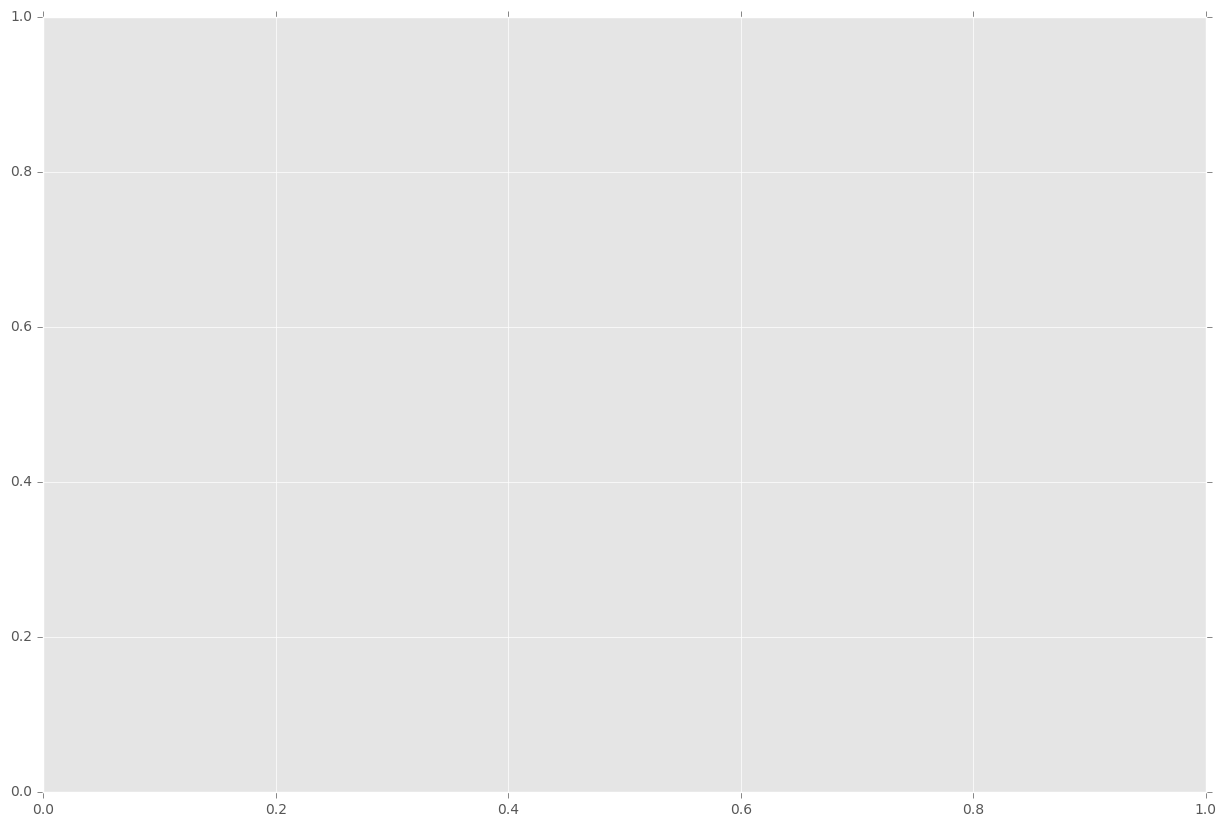

In [240]:
# for cause in causes:
#         idx = causes.index(cause)
#         df2 = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.year > fips) 
#                                          & (count_PMID_mesh_groups.year < 2016) 
#                                          & (count_PMID_mesh_groups.year > 1987) 
#                                          & (pd.isnull(count_PMID_mesh_groups[cause]) == False), ['year', cause]]
#         df2.loc[(df2.year < 2010), cause] = df2.loc[(df2.year < 2010), cause] * 1.2
#         df2.loc[(df2.year > 2010), cause] = df2.loc[(df2.year > 2010), cause] * 1.1
#         df2['log_'+cause] = np.log10(df2[cause] + 1)



# low_delta_causes = list()
# causes = ['circulatory','neoplasms','respiratory','nervous','mental']
# for cause in causes:
#     df2 = count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(low_delta)),['year', cause]]
#     df2.loc[(df2.year < 2010), cause] = df2.loc[(df2.year < 2010), cause] * 1.2
#     df2.loc[(df2.year > 2010), cause] = df2.loc[(df2.year > 2010), cause] * 1.1
#     low_delta_causes.append(df2)

# axs.hist(x=low_delta_causes, 
#          bins=10, 
#          stacked=False, 
#          label=causes)

f, axs = plt.subplots(1,1, figsize=(15,10))
axs.hist(x=[count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(low_delta)) ,'circulatory_norm'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(low_delta)),'neoplasms_norm'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(low_delta)),'respiratory_norm'], 
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(low_delta)),'nervous_norm'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(low_delta)),'mental_norm']], 
         bins=50, 
         stacked=False, 
         label=['circulatory','neoplasms','respiratory','nervous','mental'])
plt.title("frequency of publications where slope of mortality rate is < -10")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(0,600)
plt.legend()

plt.show()

In [ ]:

f, axs = plt.subplots(1,1, figsize=(15,10))
axs.hist(x=[count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(med_delta)) ,'circulatory'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(med_delta)),'neoplasms'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(med_delta)),'respiratory'], 
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(med_delta)),'nervous'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(med_delta)),'mental']], 
         bins=50, 
         stacked=False, 
         label=['circulatory','neoplasms','respiratory','nervous','mental'])
plt.title("frequency of publications where slope of mortality rate is > -5")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(0,400)
plt.legend()

plt.show()

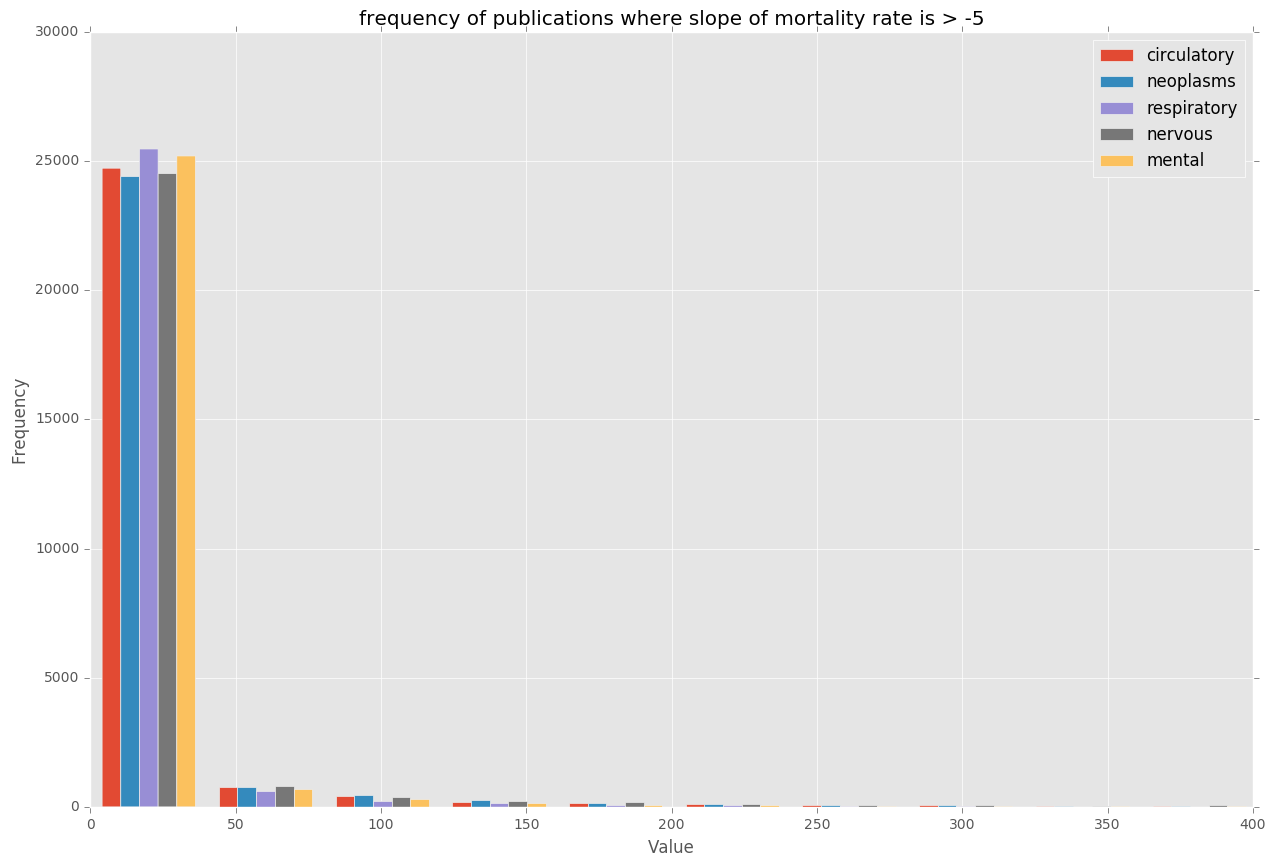

In [230]:

f, axs = plt.subplots(1,1, figsize=(15,10))
axs.hist(x=[count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(hi_delta)) ,'circulatory'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(hi_delta)),'neoplasms'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(hi_delta)),'respiratory'], 
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(hi_delta)),'nervous'],
                    count_PMID_mesh_groups.loc[(count_PMID_mesh_groups.fips.isin(hi_delta)),'mental']], 
         bins=50, 
         stacked=False, 
         label=['circulatory','neoplasms','respiratory','nervous','mental'])
plt.title("frequency of publications where slope of mortality rate is > -5")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(0,400)
plt.legend()

plt.show()

In [ ]:


# # mdf = pd.read_csv('/Users/nataliedeclerck/Documents/mapAffil/data/mesh_groups.csv', nrows=100)
# mdf.loc[pd.isnull(mdf.mesh_groups) == False, 'mesh_groups'] = \
# mdf.loc[pd.isnull(mdf.mesh_groups) == False, 'mesh_groups'].str.replace("'", "").str.replace(" ","").str[1:-1].str.split(',')

# mdf_nonull = mdf.loc[pd.isnull(mdf.mesh_groups) == False, ['PMID', 'mesh_groups']]
# mdf_nonull.is_copy = False

# merge = pd.merge(mdf_nonull, mapAffil_subset, how='right', on=['PMID'])

# for row in merge.loc[merge.mesh_groups.isnull(), 'mesh_groups'].index:
#     merge.at[row, 'mesh_groups'] = []

# def f(x):
#     return pd.Series(dict(
#         PMID_count = x['PMID'].nunique(),
#         mesh_groups = set(x['mesh_groups'].sum())))

# new = merge.groupby(['fips','year']).apply(f)